# Our goal is to predict the Churn out of a bank.

This project is being developed by:
- Jorge Rodrigo Velázquez
- Leandro Sartini de Campos
- Mohamed Maaz Rehan
- Aman Nain
- Prakash Pun
- Saraka Sahaswin
- Bibek Ranjit

## Dataset Description

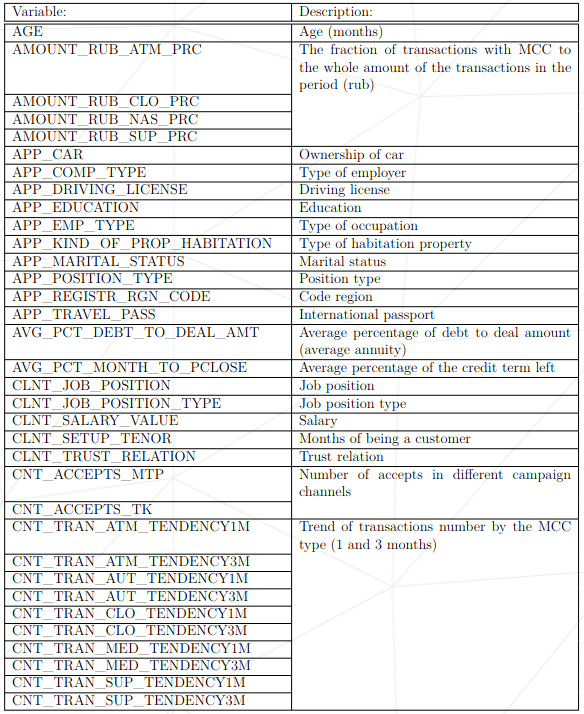

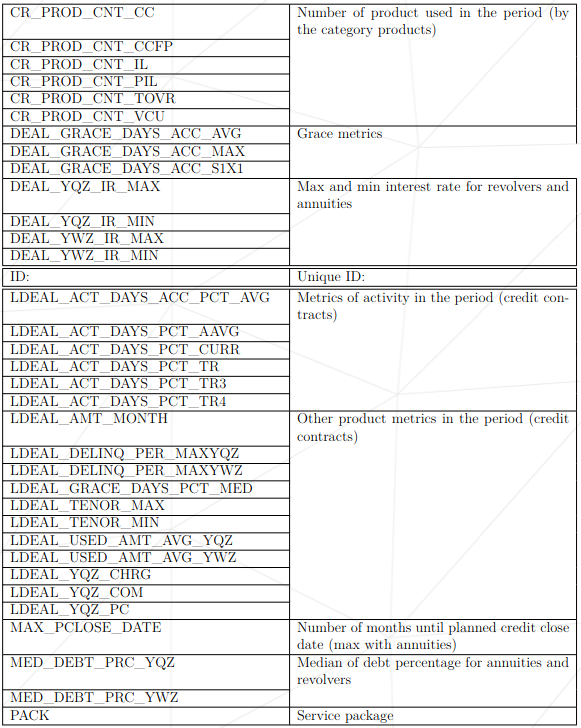

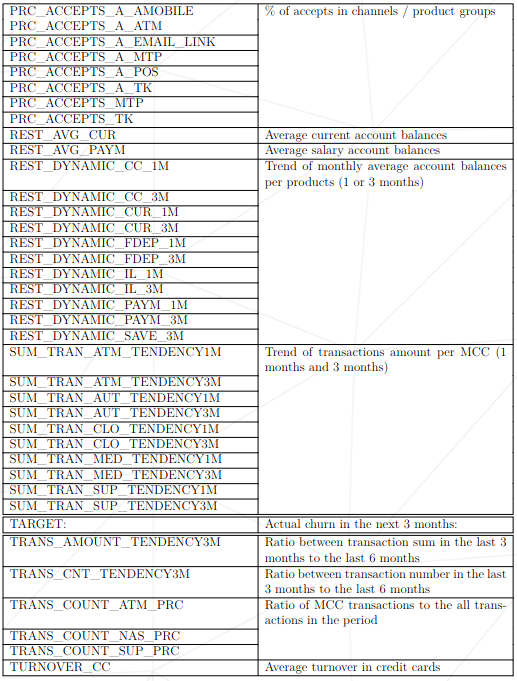

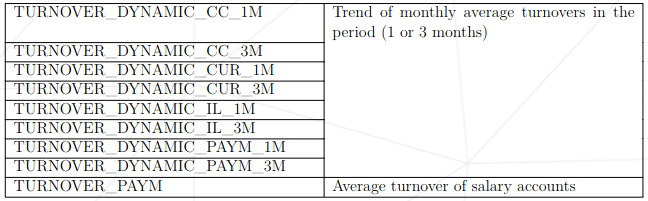

MECE Table

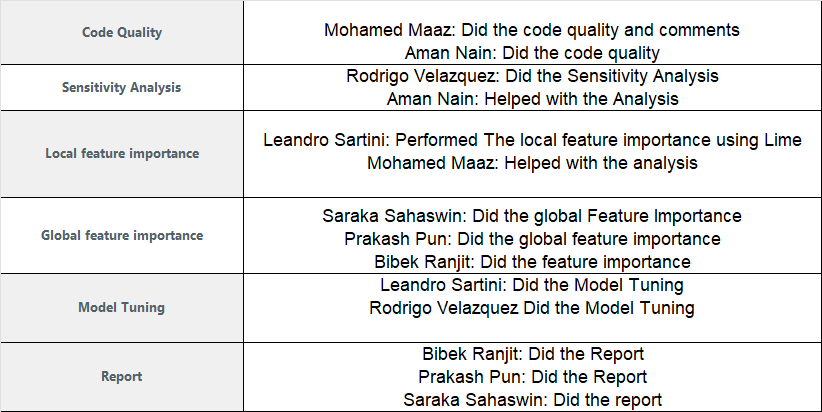

### Step by step of what we are going to do

## Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import NearMiss
import lime
from lime.lime_tabular import LimeTabularExplainer
import shap
import warnings
from SALib import ProblemSpec
import pickle
warnings.filterwarnings('ignore')

## Importing the file

In [2]:
X_train = pd.read_parquet('X_train_data_filtered.parquet')
X_test = pd.read_parquet('X_test_data_filtered.parquet')
y_train = pd.read_parquet('y_train_data.parquet')
y_test = pd.read_parquet('y_test_data.parquet')

Checking info

## Undersampling 

In [3]:
def undersampling(X, y):
    
    # Identify majority and minority classes
    classes, counts = np.unique(y, return_counts=True)
    minority_class_count = min(counts)
    
    # This will balance the majority class with the minority class
    nm = NearMiss()
    
    # Perform the undersampling
    X_resampled, y_resampled = nm.fit_resample(X, y)
    
    
    return X_resampled, y_resampled

In [4]:
X_train,y_train = undersampling(X_train,y_train)

## Balanced dataset

In [5]:
y_train.groupby(['TARGET']).size()

TARGET
0    21711
1    21711
dtype: int64

In [6]:
X_test

CR_PROD_CNT_IL  TURNOVER_DYNAMIC_IL_1M  REST_DYNAMIC_FDEP_1M  \
244774       -0.243936               -0.044953             -0.050726   
219018       -0.243936               -0.044953             -0.050726   
312981        2.073728               -0.044953             -0.050726   
282498       -0.243936               -0.044953             -0.050726   
59643        -0.243936               -0.044953             -0.050726   
...                ...                     ...                   ...   
300394       -0.243936               -0.044953             -0.050726   
198140       -0.243936               -0.044953             -0.050726   
269259       -0.243936               -0.044953             -0.050726   
65253        -0.243936               -0.044953             -0.050726   
129884        2.073728               -0.044953             -0.050726   

        REST_AVG_CUR  CR_PROD_CNT_PIL  TRANS_COUNT_ATM_PRC       AGE  \
244774     -0.250778        -0.192076             0.216669 -1.590979   
219018     -0.337666        -0.192076             0.000568 -0.799740   
312981     -0.107579        -0.192076             0.216669  0.079415   
282498     -0.202943         3.189329             0.000568 -0.096416   
59643      -0.323420        -0.192076             0.093183 -1.854726   
...              ...              ...                  ...       ...   
300394     -0.127762        -0.192076             0.067634 -0.448078   
198140     -0.251813        -0.192076             0.093183 -1.327233   
269259     -0.134610        -0.192076             0.000568 -0.535993   
65253      -0.340381        -0.192076             0.067634  0.694824   
129884     -0.202220        -0.192076             0.093183 -0.535993   

        REST_DYNAMIC_IL_1M  REST_DYNAMIC_CUR_1M  REST_AVG_PAYM  ...  PACK_103  \
244774           -0.068469            -0.432404      -0.151094  ... -0.275304   
219018           -0.068469            -0.241731      -0.151094  ... -0.275304   
312981           -0.068469             0.233471      -0.151094  ... -0.275304   
282498           -0.068469            -0.835092      -0.151094  ... -0.275304   
59643            -0.068469            -0.571630      -0.151094  ... -0.275304   
...                    ...                  ...            ...  ...       ...   
300394           -0.068469             0.968854      -0.151094  ... -0.275304   
198140           -0.068469             0.609427      -0.151094  ... -0.275304   
269259           -0.068469             2.882703      -0.151094  ... -0.275304   
65253            -0.068469             3.339258      -0.151094  ... -0.275304   
129884           -0.068469             1.437552      -0.151094  ... -0.275304   

        PACK_104  PACK_105  PACK_107  PACK_108  PACK_109  PACK_301  PACK_K01  \
244774 -0.139191 -0.380981 -0.292075  -0.00274  -0.01538 -0.109144 -0.526102   
219018 -0.139191 -0.380981  3.423783  -0.00274  -0.01538 -0.109144 -0.526102   
312981 -0.139191 -0.380981 -0.292075  -0.00274  -0.01538 -0.109144 -0.526102   
282498 -0.139191 -0.380981  3.423783  -0.00274  -0.01538 -0.109144 -0.526102   
59643  -0.139191 -0.380981 -0.292075  -0.00274  -0.01538 -0.109144 -0.526102   
...          ...       ...       ...       ...       ...       ...       ...   
300394 -0.139191 -0.380981 -0.292075  -0.00274  -0.01538 -0.109144  1.900770   
198140 -0.139191 -0.380981 -0.292075  -0.00274  -0.01538 -0.109144 -0.526102   
269259 -0.139191 -0.380981  3.423783  -0.00274  -0.01538 -0.109144 -0.526102   
65253  -0.139191 -0.380981 -0.292075  -0.00274  -0.01538 -0.109144  1.900770   
129884 -0.139191 -0.380981 -0.292075  -0.00274  -0.01538 -0.109144 -0.526102   

        PACK_M01  PACK_O01  
244774 -0.004746 -0.406695  
219018 -0.004746 -0.406695  
312981 -0.004746 -0.406695  
282498 -0.004746 -0.406695  
59643  -0.004746  2.458844  
...          ...       ...  
300394 -0.004746 -0.406695  
198140 -0.004746  2.458844  
269259 -0.004746 -0.406695  
65253  -0.004746 -0.406695  
129884 -0.004746  2.45884

### Now to the models!!

Let's decide on the first set of columns based on the logistic regression

In [7]:
# Starting Logistic Regression
logr = LogisticRegression()

#Fitting Logistic Regression
logr.fit(X_train,y_train)

#Printing errors
print('Accuracy of training is '+ str(accuracy_score(y_train,logr.predict(X_train))))
print('Precision of training is '+ str(precision_score(y_train,logr.predict(X_train))))
print('Recall of training is '+ str(recall_score(y_train,logr.predict(X_train))))
print('F1 of training is '+ str(f1_score(y_train,logr.predict(X_train))))
print('ROC AUC of training is '+ str(roc_auc_score(y_train,logr.predict(X_train))))
print()
print('Accuracy of test is '+ str(accuracy_score(y_test,logr.predict(X_test))))
print('Precision of test is '+ str(precision_score(y_test,logr.predict(X_test))))
print('Recall of test is '+ str(recall_score(y_test,logr.predict(X_test))))
print('F1 of test is '+ str(f1_score(y_test,logr.predict(X_test))))
print('ROC AUC of test is '+ str(roc_auc_score(y_test,logr.predict(X_test))))

Accuracy of training is 0.7582792133020128
Precision of training is 0.8272541581558214
Recall of training is 0.6528948459306343
F1 of training is 0.7298048705143386
ROC AUC of training is 0.7582792133020128

Accuracy of test is 0.254645374895831
Precision of test is 0.06798335579909746
Recall of test is 0.6431937898530635
F1 of test is 0.12296928418095567
ROC AUC of test is 0.4317410408374947


### From the above evaluation metrics, we can clearly see that our model is overfitted (Training accuracy - 0.75 and Testing accuracy - 0.25)

Sensitivity Analysis with SALib

In [8]:
from SALib.analyze import sobol
from SALib.sample import saltelli

In [9]:
problem = {
    'num_vars': X_train.shape[1],
    'names': X_train.columns.tolist(),
    'bounds': [[-1, 1] for _ in range(X_train.shape[1])]
}

In [10]:
# Generate samples
N = 2000  # Number of samples; adjust based on your needs and computational capacity
param_values = saltelli.sample(problem, N)

Saltelli is a sampling method used in computational models to systematically vary input parameters using Quasi-random sequences and determining their impact to the model

In [11]:
# Placeholder for model predictions
Y = np.zeros(param_values.shape[0])

for i, X in enumerate(param_values):
    # Rescale or transform X if necessary to match your model's input
    # For demonstration, assuming direct use:
    Y[i] = logr.predict_proba(X.reshape(1, -1))[:,1]

In [12]:
Si = sobol.analyze(problem, Y)

# Si is a dictionary containing keys for different metrics, such as 'S1' for first-order sensitivity indices
print(Si['S1'])

[ 1.34180506e-02 -2.48957323e-04  5.73741172e-03  8.18103333e-02
  2.49319014e-02  4.20366291e-04  1.45721941e-03  7.67422522e-05
 -7.43184602e-05  6.21061839e-01  1.44215702e-05  1.96763819e-04
  2.17716619e-04  5.27203498e-03  5.00442403e-03  1.48973346e-04
  7.29393557e-04  7.09524937e-04  2.00245191e-03  3.67994616e-04
  1.03917798e-05 -6.08924060e-05  6.39555478e-04 -5.25461531e-04
  1.56368489e-04  1.14219859e-04  2.62423961e-04]


- Sensitivity S1 -> First Order Sensitivity Indexes, it tell us how much each x's contribute to our model
- Sensitivity ST -> Total sensitivity, it means how much one variable contributes to others
- Sensitivity S2 -> Just accounts for the interaction between two variables
- Sensitivity _conf -> Confidence of the analysis


In [13]:
df_sensitivity = pd.DataFrame({
    'Variable': problem['names'],
    'First Order Sensitivity': Si['S1'],
    'Total Order Sensitivity': Si['ST']
})

# Sorting the DataFrame by Total Order Sensitivity for better visualization
df_sensitivity_sorted = df_sensitivity.sort_values(by='Total Order Sensitivity', ascending=True)

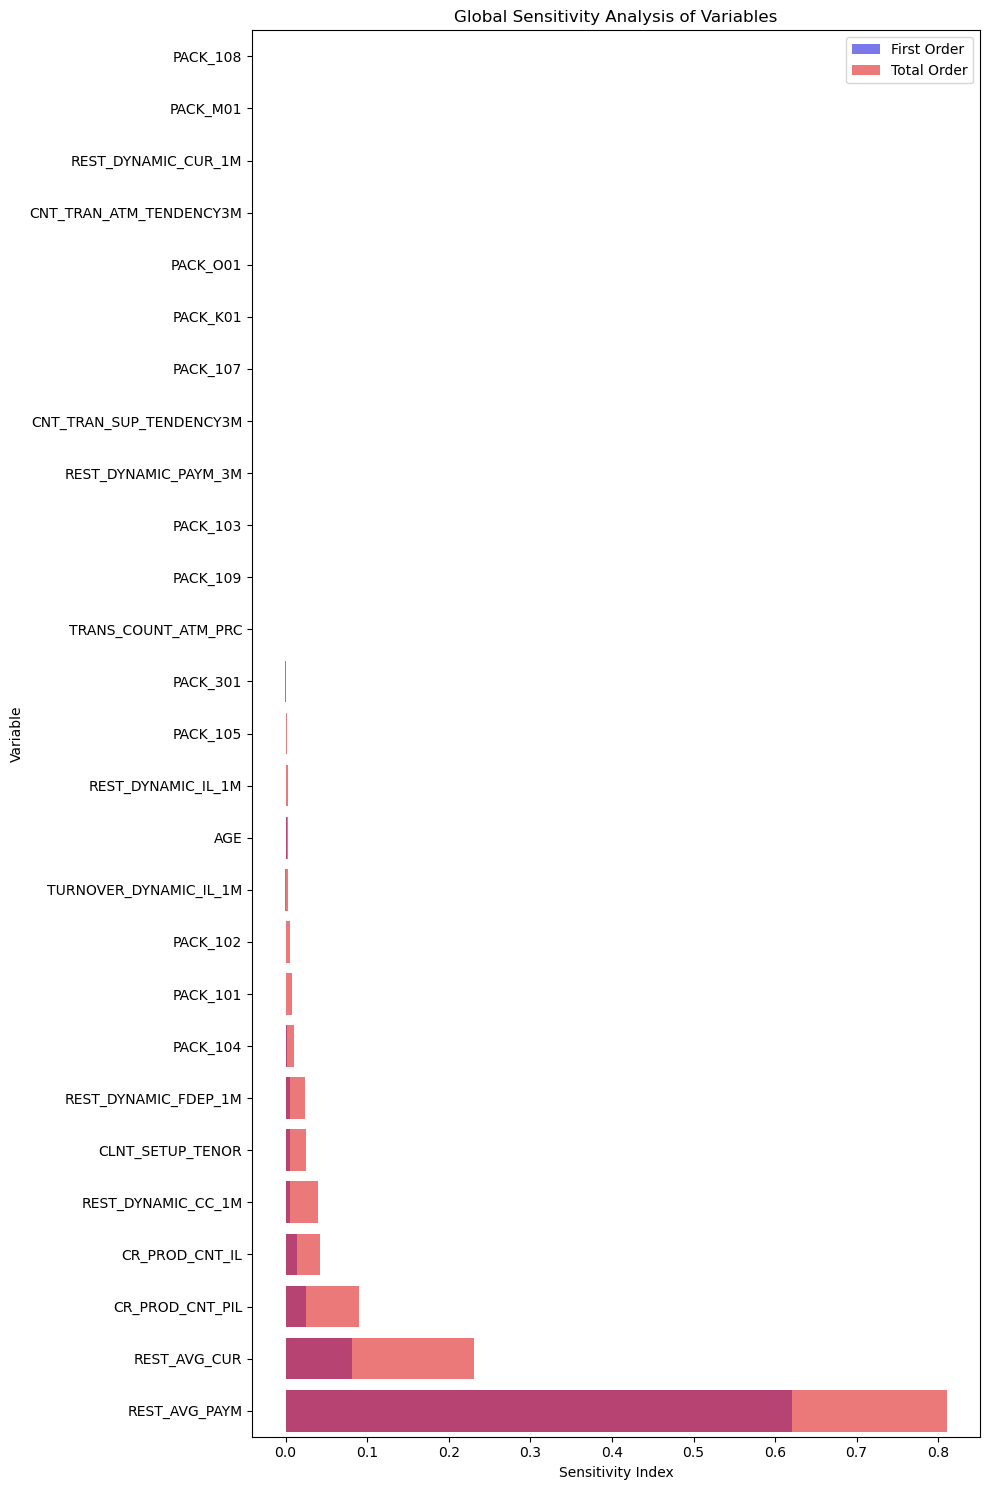

In [14]:
plt.figure(figsize=(10, 15))  # Adjust the figure size as necessary

# First Order Sensitivity
sns.barplot(x='First Order Sensitivity', y='Variable', data=df_sensitivity_sorted, label='First Order', color='blue', alpha=0.6)

# Total Order Sensitivity
sns.barplot(x='Total Order Sensitivity', y='Variable', data=df_sensitivity_sorted, label='Total Order', color='red', alpha=0.6)

plt.xlabel('Sensitivity Index')
plt.ylabel('Variable')
plt.title('Global Sensitivity Analysis of Variables')
plt.legend()

plt.tight_layout()
plt.show()

- REST_AVG_CUR and REST_AVG_PAYM, represent most of the impact to the model so it might be a good guess to review them, maybe go back to the original variables that created them

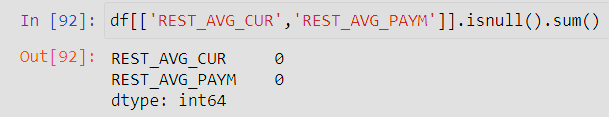

When we check this on the original DF, its not a variable that we treated, but it may be a variable that creates other variables

### Since there is not much of a difference between set 1 and 2, we will be tending to set 1

## Load the model here

In [15]:
filename = 'svc_model.pkl'
with open(filename, 'rb') as file:
    svc = pickle.load(file)

In [16]:
## Starting SVM
#svc = SVC(probability=True)
#
##Fitting SVM
#svc.fit(X_train,y_train)

#Printing errors
#print('Accuracy of training is '+ str(accuracy_score(y_train,svc.predict(X_train))))
#print('Precision of training is '+ str(precision_score(y_train,svc.predict(X_train))))
#print('Recall of training is '+ str(recall_score(y_train,svc.predict(X_train))))
#print('F1 of training is '+ str(f1_score(y_train,svc.predict(X_train))))
#print('ROC AUC of training is '+ str(roc_auc_score(y_train,svc.predict(X_train))))
#print()
#print('Accuracy of test is '+ str(accuracy_score(y_test,svc.predict(X_test))))
#print('Precision of test is '+ str(precision_score(y_test,svc.predict(X_test))))
#print('Recall of test is '+ str(recall_score(y_test,svc.predict(X_test))))
#print('F1 of test is '+ str(f1_score(y_test,svc.predict(X_test))))
#print('ROC AUC of test is '+ str(roc_auc_score(y_test,svc.predict(X_test))))

How lime works?

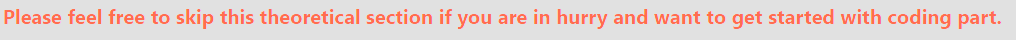

### confusion matrix

In [17]:
cm = confusion_matrix(y_test,svc.predict(X_test))

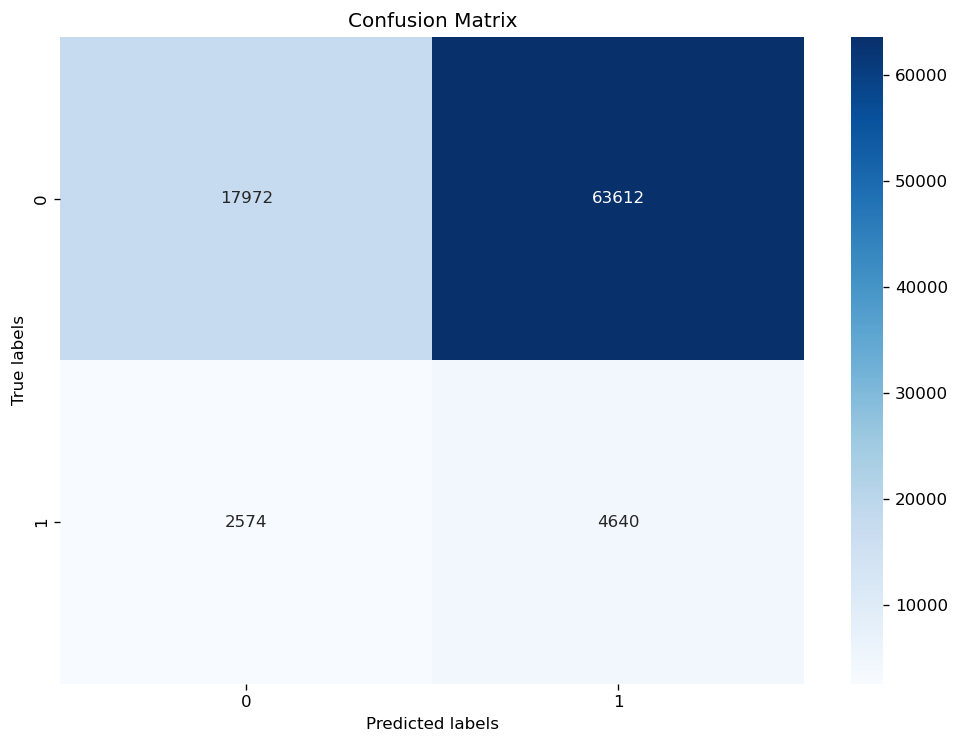

In [18]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7),dpi=120)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Lime

In [19]:
from lime import lime_tabular
import random

In [20]:
explainer = lime_tabular.LimeTabularExplainer(X_train.to_numpy(), 
                                              feature_names= X_train.columns.tolist(),
                                              class_names=['No Churn', 'Churn'],
                                              discretize_continuous=True
                                             )
explainer

## First Local Iteration

In [21]:
# idx is creating random numbers to get random data points from X_test
idx = 65511#random.randint(1, len(X_test))

print("Prediction : ", svc.predict(X_test.iloc[idx].to_numpy().reshape(1,-1)))
print("Actual :     ", y_test.iloc[idx].to_numpy().reshape(1,-1))

Prediction :  [0]
Actual :      [[1]]


In [22]:
X_test.iloc[idx]

CR_PROD_CNT_IL            -0.243936
TURNOVER_DYNAMIC_IL_1M    -0.044953
REST_DYNAMIC_FDEP_1M      -0.050726
REST_AVG_CUR              -0.299455
CR_PROD_CNT_PIL           -0.192076
TRANS_COUNT_ATM_PRC        0.067634
AGE                       -1.063486
REST_DYNAMIC_IL_1M        -0.068469
REST_DYNAMIC_CUR_1M        1.147949
REST_AVG_PAYM             -0.151094
CNT_TRAN_SUP_TENDENCY3M    0.488931
REST_DYNAMIC_PAYM_3M      -0.375851
CNT_TRAN_ATM_TENDENCY3M    0.980249
CLNT_SETUP_TENOR          -1.304090
REST_DYNAMIC_CC_1M        -0.083145
PACK_101                  -0.072293
PACK_102                  -0.700611
PACK_103                  -0.275304
PACK_104                  -0.139191
PACK_105                  -0.380981
PACK_107                  -0.292075
PACK_108                  -0.002740
PACK_109                  -0.015380
PACK_301                  -0.109144
PACK_K01                   1.900770
PACK_M01                  -0.004746
PACK_O01                  -0.406695
Name: 217203, dtype: float64

In [23]:
explanation = explainer.explain_instance(X_test.iloc[idx].to_numpy(), svc.predict_proba, num_features=len(X_train.columns))
explanation

In [24]:
X_test.iloc[idx]['CLNT_SETUP_TENOR']

-1.3040898903890974

In [25]:
X_test.iloc[idx]['CLNT_SETUP_TENOR']

-1.3040898903890974

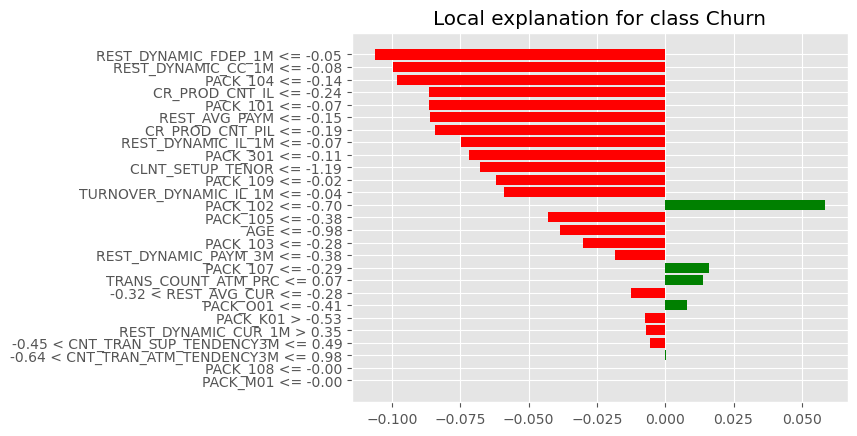

In [26]:
explanation.show_in_notebook()
with plt.style.context("ggplot"):
    explanation.as_pyplot_figure()

## Second Local Iteration

In [27]:
# idx is creating random numbers to get random data points from X_test
idx = 71105

print("Prediction : ", svc.predict(X_test.iloc[idx].to_numpy().reshape(1,-1)))
print("Actual :     ", y_test.iloc[idx].to_numpy().reshape(1,-1))

Prediction :  [0]
Actual :      [[0]]


In [28]:
X_test.iloc[idx]

CR_PROD_CNT_IL            -0.243936
TURNOVER_DYNAMIC_IL_1M    -0.044953
REST_DYNAMIC_FDEP_1M      -0.050726
REST_AVG_CUR              -0.193918
CR_PROD_CNT_PIL           -0.192076
TRANS_COUNT_ATM_PRC        0.216669
AGE                       -0.096416
REST_DYNAMIC_IL_1M        -0.068469
REST_DYNAMIC_CUR_1M        0.048786
REST_AVG_PAYM             -0.151094
CNT_TRAN_SUP_TENDENCY3M   -0.451908
REST_DYNAMIC_PAYM_3M      -0.375851
CNT_TRAN_ATM_TENDENCY3M   -0.635740
CLNT_SETUP_TENOR          -0.443035
REST_DYNAMIC_CC_1M        -0.083145
PACK_101                  -0.072293
PACK_102                   1.427326
PACK_103                  -0.275304
PACK_104                  -0.139191
PACK_105                  -0.380981
PACK_107                  -0.292075
PACK_108                  -0.002740
PACK_109                  -0.015380
PACK_301                  -0.109144
PACK_K01                  -0.526102
PACK_M01                  -0.004746
PACK_O01                  -0.406695
Name: 215861, dtype: float64

In [29]:
explanation = explainer.explain_instance(X_test.iloc[idx].to_numpy(), svc.predict_proba, num_features=len(X_train.columns))
explanation

In [30]:
X_test.iloc[idx]['CLNT_SETUP_TENOR']

-0.44303515356774936

In [31]:
X_test.iloc[idx]['CLNT_SETUP_TENOR']

-0.44303515356774936

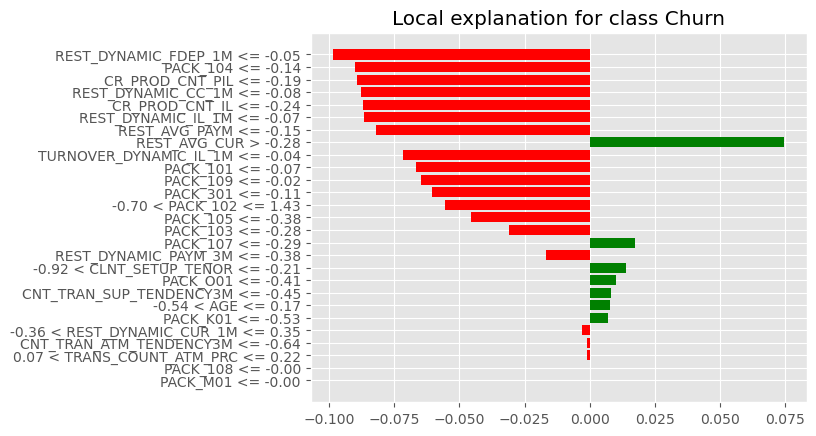

In [32]:
explanation.show_in_notebook()
with plt.style.context("ggplot"):
    explanation.as_pyplot_figure()

## Third Local Iteration

In [33]:
# idx is creating random numbers to get random data points from X_test
idx = 25526

print("Prediction : ", svc.predict(X_test.iloc[idx].to_numpy().reshape(1,-1)))
print("Actual :     ", y_test.iloc[idx].to_numpy().reshape(1,-1))

Prediction :  [1]
Actual :      [[0]]


In [34]:
X_test.iloc[idx]

CR_PROD_CNT_IL             2.073728
TURNOVER_DYNAMIC_IL_1M    -0.044953
REST_DYNAMIC_FDEP_1M      -0.050726
REST_AVG_CUR              -0.349593
CR_PROD_CNT_PIL           -0.192076
TRANS_COUNT_ATM_PRC        0.530999
AGE                        1.134402
REST_DYNAMIC_IL_1M        -0.068469
REST_DYNAMIC_CUR_1M       -0.899354
REST_AVG_PAYM              0.081266
CNT_TRAN_SUP_TENDENCY3M   -0.524888
REST_DYNAMIC_PAYM_3M       2.071528
CNT_TRAN_ATM_TENDENCY3M   -0.892280
CLNT_SETUP_TENOR          -0.092612
REST_DYNAMIC_CC_1M        -0.083145
PACK_101                  -0.072293
PACK_102                  -0.700611
PACK_103                  -0.275304
PACK_104                  -0.139191
PACK_105                   2.624803
PACK_107                  -0.292075
PACK_108                  -0.002740
PACK_109                  -0.015380
PACK_301                  -0.109144
PACK_K01                  -0.526102
PACK_M01                  -0.004746
PACK_O01                  -0.406695
Name: 346858, dtype: float64

In [35]:
explanation = explainer.explain_instance(X_test.iloc[idx].to_numpy(), svc.predict_proba, num_features=len(X_train.columns))
explanation

In [36]:
X_test.iloc[idx]['CLNT_SETUP_TENOR']

-0.0926117150336423

In [37]:
X_test.iloc[idx]['CLNT_SETUP_TENOR']

-0.0926117150336423

PACK_102
PACK_105
PACK_107
K01
O01

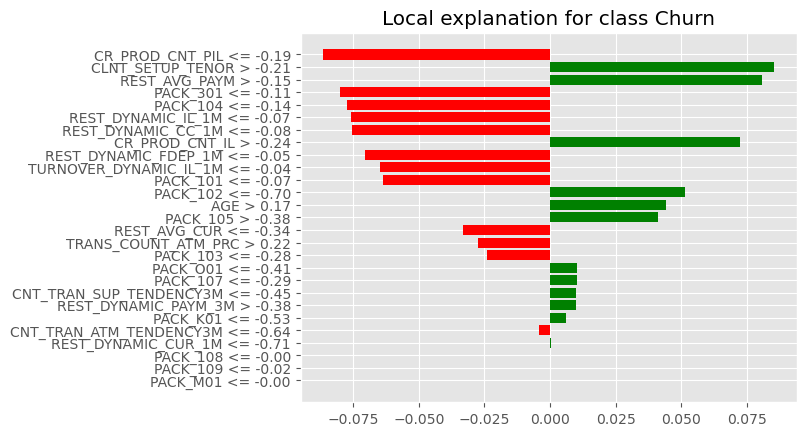

In [38]:
explanation.show_in_notebook()
with plt.style.context("ggplot"):
    explanation.as_pyplot_figure()

### We will continue with shap 

In [36]:
import shap
shap.initjs()

In [49]:
X_train_sampled = shap.sample(X_train,100)

In [50]:
explainer = shap.KernelExplainer(svc.predict_proba, X_train_sampled)

In [51]:
X_test_sampled = shap.sample(X_test,100)

In [53]:
shap_values = explainer.shap_values(X_test_sampled)

  0%|          | 0/100 [00:00<?, ?it/s]

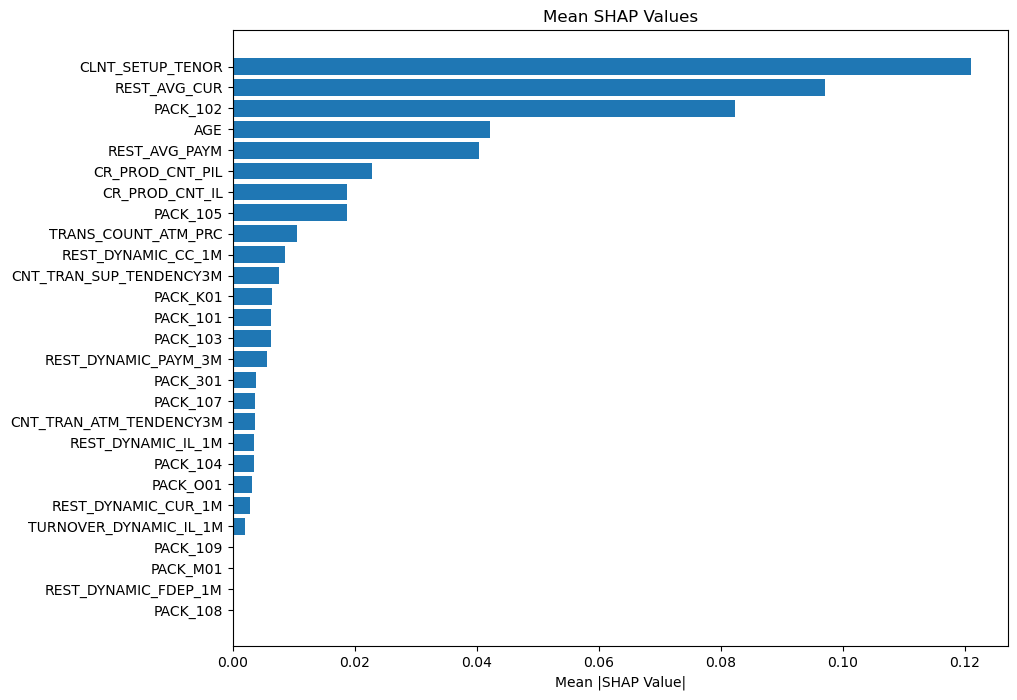

In [54]:
mean_shap_values = np.mean(np.abs(shap_values), axis=0)
feature_names = X_train_sampled.columns

sorted_indices = np.argsort(np.sum(np.abs(mean_shap_values), axis=1))
sorted_mean_shap_values = mean_shap_values[sorted_indices]
sorted_feature_names = np.array(feature_names)[sorted_indices]

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_feature_names)), sorted_mean_shap_values[:, 0], align='center')
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Mean |SHAP Value|')
plt.title('Mean SHAP Values')
plt.show()

We can try a few things for model tuning:
- AGE we could try to make AGE be in years, at first glimpse we thought that AGE was wrong and then from the description of the columns we saw that it was in months, so turning it into years may seem to look better for the model because the ranges won't be so big when the model is trying to learn.
- We have to review the CLNT_SETUP_TENO which tells to the model how long the client has been a customer
- With PACK we saw that overall categories are highly contributing to being a CHURN, so it could be that even if a client gets a product there still may be problems or the product is bad in general so we have to deep dive and analyze, either way we must check PACK in general.
- REST_AVG_CUR,CLNT_SETUP_TENOR,CNT_TRAN_SUP_TENDENCY3M, REST_DYNAMIC_PAYM_3M and AGE as well. Contributes to being CHURN almost making a correct prediction being incorrect, so we might have to take a look that variable as well.

### First we will start with fixing the age

### importing a file

In [866]:
df = pd.read_csv('first_preprocessed_df.csv')

In [867]:
df['AGE']=df['AGE']/12

### train test split

In [868]:
X_train,X_test,y_train,y_test = train_test_split(df[X_col],df[y_col],test_size= 0.25, random_state = 42)

Let's start with the ones that are concentrated

In [869]:
def get_mode(series):
    if not series.mode().empty:
        s = series.mode().iloc[0]  
        return s
    else:
        return None

In [870]:
imputation_dict = {
 'AMOUNT_RUB_CLO_PRC' :  X_train.groupby('PACK')['AMOUNT_RUB_CLO_PRC'].apply(get_mode).to_dict(),
 'AMOUNT_RUB_NAS_PRC' :  X_train.groupby('PACK')['AMOUNT_RUB_NAS_PRC'].apply(get_mode).to_dict(),
 'TRANS_COUNT_NAS_PRC' : X_train.groupby('PACK')['TRANS_COUNT_NAS_PRC'].apply(get_mode).to_dict()
}

In [871]:
pack_list = list(df['PACK'].unique())
pack_list.remove('108')
pack_list.remove('M01')
for item in df['PACK'].unique():
    X_train.loc[X_train['PACK']== item,'AMOUNT_RUB_CLO_PRC'] = imputation_dict['AMOUNT_RUB_CLO_PRC'][item]
    X_train.loc[X_train['PACK']== item,'AMOUNT_RUB_NAS_PRC'] = imputation_dict['AMOUNT_RUB_NAS_PRC'][item]
    X_train.loc[X_train['PACK']== item,'TRANS_COUNT_NAS_PRC'] = imputation_dict['TRANS_COUNT_NAS_PRC'][item]
    X_test.loc[X_test['PACK']== item,'AMOUNT_RUB_CLO_PRC'] = imputation_dict['AMOUNT_RUB_CLO_PRC'][item]
    X_test.loc[X_test['PACK']== item,'AMOUNT_RUB_NAS_PRC'] = imputation_dict['AMOUNT_RUB_NAS_PRC'][item]
    X_test.loc[X_test['PACK']== item,'TRANS_COUNT_NAS_PRC'] = imputation_dict['TRANS_COUNT_NAS_PRC'][item]

amount_clo = X_train['AMOUNT_RUB_CLO_PRC'].mode()[0]
amount_nas = X_train['AMOUNT_RUB_NAS_PRC'].mode()[0]
trans_nas = X_train['TRANS_COUNT_NAS_PRC'].mode()[0]
    
X_train['AMOUNT_RUB_CLO_PRC'].fillna(amount_clo,inplace = True)
X_train['AMOUNT_RUB_NAS_PRC'].fillna(amount_nas,inplace = True)
X_train['TRANS_COUNT_NAS_PRC'].fillna(trans_nas,inplace = True)
X_test['AMOUNT_RUB_CLO_PRC'].fillna(amount_clo,inplace = True)
X_test['AMOUNT_RUB_NAS_PRC'].fillna(amount_nas,inplace = True)
X_test['TRANS_COUNT_NAS_PRC'].fillna(trans_nas,inplace = True)

In [872]:
check = ['AMOUNT_RUB_CLO_PRC','AMOUNT_RUB_NAS_PRC','TRANS_COUNT_NAS_PRC']

In [873]:
X_train[check].isnull().sum()

AMOUNT_RUB_CLO_PRC     0
AMOUNT_RUB_NAS_PRC     0
TRANS_COUNT_NAS_PRC    0
dtype: int64

Let's go to the Skewed ones now

In [874]:
imputation_dict = {
 'AMOUNT_RUB_SUP_PRC' :  X_train.groupby('PACK')['AMOUNT_RUB_SUP_PRC'].median().to_dict(),
 'TRANS_COUNT_SUP_PRC' :  X_train.groupby('PACK')['TRANS_COUNT_SUP_PRC'].median().to_dict(),
 'TRANS_COUNT_ATM_PRC' : X_train.groupby('PACK')['TRANS_COUNT_ATM_PRC'].median().to_dict(),
 'AMOUNT_RUB_ATM_PRC' :  X_train.groupby('PACK')['AMOUNT_RUB_ATM_PRC'].median().to_dict(),
 'CNT_TRAN_ATM_TENDENCY1M' :  X_train.groupby('PACK')['CNT_TRAN_ATM_TENDENCY1M'].median().to_dict(),
 'SUM_TRAN_ATM_TENDENCY1M' :  X_train.groupby('PACK')['SUM_TRAN_ATM_TENDENCY1M'].median().to_dict()
}

In [875]:
pack_list = list(df['PACK'].unique())
pack_list.remove('108')
pack_list.remove('M01')
for item in df['PACK'].unique():
    X_train.loc[X_train['PACK']== item,'AMOUNT_RUB_SUP_PRC'] = imputation_dict['AMOUNT_RUB_SUP_PRC'][item]
    X_train.loc[X_train['PACK']== item,'TRANS_COUNT_SUP_PRC'] = imputation_dict['TRANS_COUNT_SUP_PRC'][item]
    X_train.loc[X_train['PACK']== item,'TRANS_COUNT_ATM_PRC'] = imputation_dict['TRANS_COUNT_ATM_PRC'][item]
    X_train.loc[X_train['PACK']== item,'AMOUNT_RUB_ATM_PRC'] = imputation_dict['AMOUNT_RUB_ATM_PRC'][item]
    X_train.loc[X_train['PACK']== item,'CNT_TRAN_ATM_TENDENCY1M'] = imputation_dict['CNT_TRAN_ATM_TENDENCY1M'][item]
    X_train.loc[X_train['PACK']== item,'SUM_TRAN_ATM_TENDENCY1M'] = imputation_dict['SUM_TRAN_ATM_TENDENCY1M'][item]
    X_test.loc[X_test['PACK']== item,'AMOUNT_RUB_SUP_PRC'] = imputation_dict['AMOUNT_RUB_SUP_PRC'][item]
    X_test.loc[X_test['PACK']== item,'TRANS_COUNT_SUP_PRC'] = imputation_dict['TRANS_COUNT_SUP_PRC'][item]
    X_test.loc[X_test['PACK']== item,'TRANS_COUNT_ATM_PRC'] = imputation_dict['TRANS_COUNT_ATM_PRC'][item]
    X_test.loc[X_test['PACK']== item,'AMOUNT_RUB_ATM_PRC'] = imputation_dict['AMOUNT_RUB_ATM_PRC'][item]
    X_test.loc[X_test['PACK']== item,'CNT_TRAN_ATM_TENDENCY1M'] = imputation_dict['CNT_TRAN_ATM_TENDENCY1M'][item]
    X_test.loc[X_test['PACK']== item,'SUM_TRAN_ATM_TENDENCY1M'] = imputation_dict['SUM_TRAN_ATM_TENDENCY1M'][item]

median_1 = X_train['AMOUNT_RUB_SUP_PRC'].median()
median_2 = X_train['TRANS_COUNT_SUP_PRC'].median()
median_3 = X_train['TRANS_COUNT_ATM_PRC'].median()
median_4 = X_train['AMOUNT_RUB_ATM_PRC'].median()
median_5 = X_train['CNT_TRAN_ATM_TENDENCY1M'].median()
median_6 = X_train['SUM_TRAN_ATM_TENDENCY1M'].median()
    
X_train['AMOUNT_RUB_SUP_PRC'].fillna(median_1,inplace = True)
X_train['TRANS_COUNT_SUP_PRC'].fillna(median_2,inplace = True)
X_train['TRANS_COUNT_ATM_PRC'].fillna(median_3,inplace = True)
X_train['AMOUNT_RUB_ATM_PRC'].fillna(median_4,inplace = True)
X_train['CNT_TRAN_ATM_TENDENCY1M'].fillna(median_5,inplace = True)
X_train['SUM_TRAN_ATM_TENDENCY1M'].fillna(median_6,inplace = True)
X_test['AMOUNT_RUB_SUP_PRC'].fillna(median_1,inplace = True)
X_test['TRANS_COUNT_SUP_PRC'].fillna(median_2,inplace = True)
X_test['TRANS_COUNT_ATM_PRC'].fillna(median_3,inplace = True)
X_test['AMOUNT_RUB_ATM_PRC'].fillna(median_4,inplace = True)
X_test['CNT_TRAN_ATM_TENDENCY1M'].fillna(median_5,inplace = True)
X_test['SUM_TRAN_ATM_TENDENCY1M'].fillna(median_6,inplace = True)

In [876]:
check = ['AMOUNT_RUB_SUP_PRC'
,'TRANS_COUNT_SUP_PRC'
,'TRANS_COUNT_ATM_PRC'
,'AMOUNT_RUB_ATM_PRC'
,'CNT_TRAN_ATM_TENDENCY1M'
,'SUM_TRAN_ATM_TENDENCY1M']

In [877]:
X_train[check].isnull().sum()

AMOUNT_RUB_SUP_PRC         0
TRANS_COUNT_SUP_PRC        0
TRANS_COUNT_ATM_PRC        0
AMOUNT_RUB_ATM_PRC         0
CNT_TRAN_ATM_TENDENCY1M    0
SUM_TRAN_ATM_TENDENCY1M    0
dtype: int64

Let's go to the Normal ones ones now

In [878]:
null_cols

['AMOUNT_RUB_CLO_PRC',
 'AMOUNT_RUB_SUP_PRC',
 'AMOUNT_RUB_NAS_PRC',
 'TRANS_COUNT_SUP_PRC',
 'TRANS_COUNT_NAS_PRC',
 'TRANS_COUNT_ATM_PRC',
 'AMOUNT_RUB_ATM_PRC',
 'CNT_TRAN_SUP_TENDENCY3M',
 'SUM_TRAN_SUP_TENDENCY3M',
 'CNT_TRAN_ATM_TENDENCY3M',
 'CNT_TRAN_ATM_TENDENCY1M',
 'SUM_TRAN_ATM_TENDENCY3M',
 'SUM_TRAN_ATM_TENDENCY1M',
 'TRANS_AMOUNT_TENDENCY3M',
 'TRANS_CNT_TENDENCY3M']

In [879]:
imputation_dict = {
 'CNT_TRAN_SUP_TENDENCY3M' :  X_train.groupby('PACK')['CNT_TRAN_SUP_TENDENCY3M'].mean().to_dict(),
 'SUM_TRAN_SUP_TENDENCY3M' :  X_train.groupby('PACK')['SUM_TRAN_SUP_TENDENCY3M'].mean().to_dict(),
 'CNT_TRAN_ATM_TENDENCY3M' : X_train.groupby('PACK') ['CNT_TRAN_ATM_TENDENCY3M'].mean().to_dict(),
 'AMOUNT_RUB_ATM_PRC' :  X_train.groupby('PACK')['AMOUNT_RUB_ATM_PRC'].mean().to_dict(),
 'SUM_TRAN_ATM_TENDENCY3M' :  X_train.groupby('PACK')['SUM_TRAN_ATM_TENDENCY3M'].mean().to_dict(),
 'TRANS_AMOUNT_TENDENCY3M' :  X_train.groupby('PACK')['TRANS_AMOUNT_TENDENCY3M'].mean().to_dict(),
 'TRANS_CNT_TENDENCY3M' :  X_train.groupby('PACK')['TRANS_CNT_TENDENCY3M'].mean().to_dict()
}

In [880]:
pack_list = list(df['PACK'].unique())
pack_list.remove('108')
pack_list.remove('M01')
for item in df['PACK'].unique():
    X_train.loc[X_train['PACK']== item,'CNT_TRAN_SUP_TENDENCY3M'] = imputation_dict['CNT_TRAN_SUP_TENDENCY3M'][item]
    X_train.loc[X_train['PACK']== item,'SUM_TRAN_SUP_TENDENCY3M'] = imputation_dict['SUM_TRAN_SUP_TENDENCY3M'][item]
    X_train.loc[X_train['PACK']== item,'CNT_TRAN_ATM_TENDENCY3M'] = imputation_dict['CNT_TRAN_ATM_TENDENCY3M'][item]
    X_train.loc[X_train['PACK']== item,'AMOUNT_RUB_ATM_PRC'] = imputation_dict['AMOUNT_RUB_ATM_PRC'][item]
    X_train.loc[X_train['PACK']== item,'SUM_TRAN_ATM_TENDENCY3M'] = imputation_dict['SUM_TRAN_ATM_TENDENCY3M'][item]
    X_train.loc[X_train['PACK']== item,'TRANS_AMOUNT_TENDENCY3M'] = imputation_dict['TRANS_AMOUNT_TENDENCY3M'][item]
    X_train.loc[X_train['PACK']== item,'TRANS_CNT_TENDENCY3M'] = imputation_dict['TRANS_CNT_TENDENCY3M'][item]
    X_test.loc[X_test['PACK']== item,'CNT_TRAN_SUP_TENDENCY3M'] = imputation_dict['CNT_TRAN_SUP_TENDENCY3M'][item]
    X_test.loc[X_test['PACK']== item,'SUM_TRAN_SUP_TENDENCY3M'] = imputation_dict['SUM_TRAN_SUP_TENDENCY3M'][item]
    X_test.loc[X_test['PACK']== item,'CNT_TRAN_ATM_TENDENCY3M'] = imputation_dict['CNT_TRAN_ATM_TENDENCY3M'][item]
    X_test.loc[X_test['PACK']== item,'AMOUNT_RUB_ATM_PRC'] = imputation_dict['AMOUNT_RUB_ATM_PRC'][item]
    X_test.loc[X_test['PACK']== item,'SUM_TRAN_ATM_TENDENCY3M'] = imputation_dict['SUM_TRAN_ATM_TENDENCY3M'][item]
    X_test.loc[X_test['PACK']== item,'TRANS_AMOUNT_TENDENCY3M'] = imputation_dict['TRANS_AMOUNT_TENDENCY3M'][item]
    X_test.loc[X_test['PACK']== item,'TRANS_CNT_TENDENCY3M'] = imputation_dict['TRANS_CNT_TENDENCY3M'][item]

mean_1 = X_train['CNT_TRAN_SUP_TENDENCY3M'].mean()
mean_2 = X_train['SUM_TRAN_SUP_TENDENCY3M'].mean()
mean_3 = X_train['CNT_TRAN_ATM_TENDENCY3M'].mean()
mean_4 = X_train['AMOUNT_RUB_ATM_PRC'].mean()
mean_5 = X_train['SUM_TRAN_ATM_TENDENCY3M'].mean()
mean_6 = X_train['TRANS_AMOUNT_TENDENCY3M'].mean()
mean_7 = X_train['TRANS_CNT_TENDENCY3M'].mean()
    
X_train['CNT_TRAN_SUP_TENDENCY3M'].fillna(mean_1,inplace = True)
X_train['SUM_TRAN_SUP_TENDENCY3M'].fillna(mean_2,inplace = True)
X_train['CNT_TRAN_ATM_TENDENCY3M'].fillna(mean_3,inplace = True)
X_train['AMOUNT_RUB_ATM_PRC'].fillna(mean_4,inplace = True)
X_train['SUM_TRAN_ATM_TENDENCY3M'].fillna(mean_5,inplace = True)
X_train['TRANS_AMOUNT_TENDENCY3M'].fillna(mean_6,inplace = True)
X_train['TRANS_CNT_TENDENCY3M'].fillna(mean_7,inplace = True)
X_test['CNT_TRAN_SUP_TENDENCY3M'].fillna(mean_1,inplace = True)
X_test['SUM_TRAN_SUP_TENDENCY3M'].fillna(mean_2,inplace = True)
X_test['CNT_TRAN_ATM_TENDENCY3M'].fillna(mean_3,inplace = True)
X_test['AMOUNT_RUB_ATM_PRC'].fillna(mean_4,inplace = True)
X_test['SUM_TRAN_ATM_TENDENCY3M'].fillna(mean_5,inplace = True)
X_test['TRANS_AMOUNT_TENDENCY3M'].fillna(mean_6,inplace = True)
X_test['TRANS_CNT_TENDENCY3M'].fillna(mean_7,inplace = True)

In [881]:
check = ['CNT_TRAN_SUP_TENDENCY3M'
,'SUM_TRAN_SUP_TENDENCY3M'
,'CNT_TRAN_ATM_TENDENCY3M'
,'AMOUNT_RUB_ATM_PRC'
,'SUM_TRAN_ATM_TENDENCY3M'
,'TRANS_AMOUNT_TENDENCY3M'
,'TRANS_CNT_TENDENCY3M']

In [882]:
X_train[check].isnull().sum()

CNT_TRAN_SUP_TENDENCY3M    0
SUM_TRAN_SUP_TENDENCY3M    0
CNT_TRAN_ATM_TENDENCY3M    0
AMOUNT_RUB_ATM_PRC         0
SUM_TRAN_ATM_TENDENCY3M    0
TRANS_AMOUNT_TENDENCY3M    0
TRANS_CNT_TENDENCY3M       0
dtype: int64

We have to apply Onehot to the categorical, otherwise Standard Scaler won't work

In [883]:
oneh = OneHotEncoder(sparse_output=False)
oneh.fit(X_train[['PACK']])

OneHotEncoder(sparse_output=False)

In [884]:
col_names = oneh.get_feature_names_out()

In [885]:
X_train_dummies = pd.DataFrame(oneh.transform(X_train[['PACK']]),columns = col_names)
X_train_dummies.index = X_train.index
X_train = pd.merge(X_train,X_train_dummies,left_index=True,right_index=True)

X_test_dummies = pd.DataFrame(oneh.transform(X_test[['PACK']]),columns = col_names)
X_test_dummies.index = X_test.index
X_test = pd.merge(X_test,X_test_dummies,left_index=True,right_index=True)

In [886]:
X_train.drop(columns = 'PACK',inplace = True)
X_test.drop(columns = 'PACK',inplace = True)

Now to scale we are using the Standard Scaler

In [887]:
scaler = StandardScaler()

In [888]:
scaler.fit(X_train)

StandardScaler()

In [889]:
X_train_scaled = scaler.transform(X_train)
X_train = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)

In [890]:
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

Below we will create a list of columns that we will be using

In [891]:
cols_to_use = ['CR_PROD_CNT_IL', 'TURNOVER_DYNAMIC_IL_1M', 'REST_DYNAMIC_FDEP_1M',
       'REST_AVG_CUR', 'CR_PROD_CNT_PIL', 'TRANS_COUNT_ATM_PRC', 'AGE',
       'REST_DYNAMIC_IL_1M', 'REST_DYNAMIC_CUR_1M', 'REST_AVG_PAYM',
       'CNT_TRAN_SUP_TENDENCY3M', 'REST_DYNAMIC_PAYM_3M',
       'CNT_TRAN_ATM_TENDENCY3M', 'CLNT_SETUP_TENOR', 'REST_DYNAMIC_CC_1M',
       'PACK_101', 'PACK_102', 'PACK_103', 'PACK_104', 'PACK_105', 'PACK_107',
       'PACK_108', 'PACK_109', 'PACK_301', 'PACK_K01', 'PACK_M01', 'PACK_O01']

In [892]:
X_train = X_train[cols_to_use].copy()
X_test = X_test[cols_to_use].copy()

Let's use an Undersample Technique to make it better for logistic regression and SVM's to run, and with first set of columns.

- The Technique is Called NearMiss.

In [893]:
def undersampling(X, y):
    
    # Identify majority and minority classes
    classes, counts = np.unique(y, return_counts=True)
    minority_class_count = min(counts)
    
    # This will balance the majority class with the minority class
    nm = NearMiss()
    
    # Perform the undersampling
    X_resampled, y_resampled = nm.fit_resample(X, y)
    
    
    return X_resampled, y_resampled

In [894]:
X_train,y_train = undersampling(X_train,y_train)

In [895]:
y_train = y_train.to_frame()

In [896]:
y_train.groupby(['TARGET']).size()

TARGET
0    21711
1    21711
dtype: int64

### Now to the models!!

Let's decide on the first set of columns based on the logistic regression

## Logistic Regression

In [897]:
# Starting Logistic Regression
logr = LogisticRegression()

#Fitting Logistic Regression
logr.fit(X_train,y_train)

#Printing errors
print('Accuracy of training is '+ str(accuracy_score(y_train,logr.predict(X_train))))
print('Precision of training is '+ str(precision_score(y_train,logr.predict(X_train))))
print('Recall of training is '+ str(recall_score(y_train,logr.predict(X_train))))
print('F1 of training is '+ str(f1_score(y_train,logr.predict(X_train))))
print('ROC AUC of training is '+ str(roc_auc_score(y_train,logr.predict(X_train))))
print()
print('Accuracy of test is '+ str(accuracy_score(y_test,logr.predict(X_test))))
print('Precision of test is '+ str(precision_score(y_test,logr.predict(X_test))))
print('Recall of test is '+ str(recall_score(y_test,logr.predict(X_test))))
print('F1 of test is '+ str(f1_score(y_test,logr.predict(X_test))))
print('ROC AUC of test is '+ str(roc_auc_score(y_test,logr.predict(X_test))))

Accuracy of training is 0.7582792133020128
Precision of training is 0.8272541581558214
Recall of training is 0.6528948459306343
F1 of training is 0.7298048705143386
ROC AUC of training is 0.7582792133020128

Accuracy of test is 0.254645374895831
Precision of test is 0.06798335579909746
Recall of test is 0.6431937898530635
F1 of test is 0.12296928418095567
ROC AUC of test is 0.4317410408374947


## Support Vector Machine

In [903]:
# Starting SVM
svc = SVC(probability=True)

#Fitting SVM
svc.fit(X_train,y_train)

#Printing errors
print('Accuracy of training is '+ str(accuracy_score(y_train,svc.predict(X_train))))
print('Precision of training is '+ str(precision_score(y_train,svc.predict(X_train))))
print('Recall of training is '+ str(recall_score(y_train,svc.predict(X_train))))
print('F1 of training is '+ str(f1_score(y_train,svc.predict(X_train))))
print('ROC AUC of training is '+ str(roc_auc_score(y_train,svc.predict(X_train))))
print()
print('Accuracy of test is '+ str(accuracy_score(y_test,svc.predict(X_test))))
print('Precision of test is '+ str(precision_score(y_test,svc.predict(X_test))))
print('Recall of test is '+ str(recall_score(y_test,svc.predict(X_test))))
print('F1 of test is '+ str(f1_score(y_test,svc.predict(X_test))))
print('ROC AUC of test is '+ str(roc_auc_score(y_test,svc.predict(X_test))))

Accuracy of training is 0.794873566394915
Precision of training is 0.9065794487488886
Recall of training is 0.6575008060430196
F1 of training is 0.7622073310729637
ROC AUC of training is 0.794873566394915

Accuracy of test is 0.27008491182233835
Precision of test is 0.0703149477076402
Recall of test is 0.6533130024951483
F1 of test is 0.1269648846324807
ROC AUC of test is 0.44475563833327725


### confusion matrix

In [904]:
cm = confusion_matrix(y_test,svc.predict(X_test))

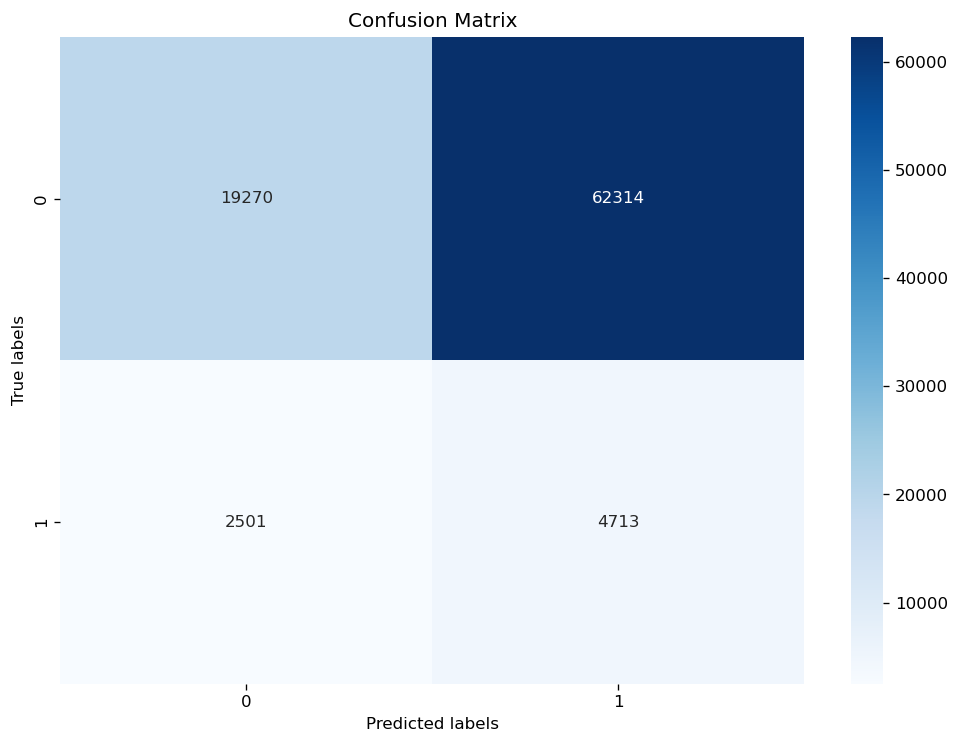

In [905]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7),dpi=120)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## AUC ROC

In [906]:
y_prob = svc.predict_proba(X_test)[:, 1]

In [907]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

In [908]:
roc_auc = auc(fpr, tpr)

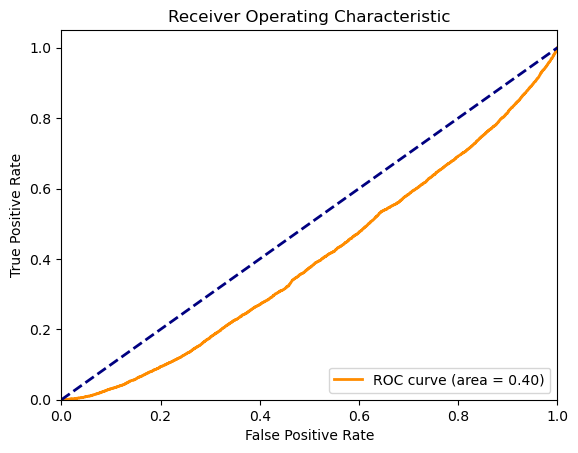

In [909]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

So far no result with the fixing of the <b>Age</b> Column

### Let's do a check with the PACK column, let's try two things:
- Removing it completely
- Checking for values that could be biasing the model
- PACK impacts positive/negative classe for CHURN as we saw with LIME, that's one of the main reasons we are focusing on it.

<b> Let's start removing and checking </b>

In [910]:
pack_cols = ['PACK_101', 'PACK_102', 'PACK_103',
       'PACK_104', 'PACK_105', 'PACK_107', 'PACK_108', 'PACK_109', 'PACK_301',
       'PACK_K01', 'PACK_M01', 'PACK_O01']

In [911]:
train_cols = list(X_train.columns)

In [912]:
for item in pack_cols:
    train_cols.remove(item)

## Logistic Regression

In [913]:
# Starting Logistic Regression
logr = LogisticRegression()

#Fitting Logistic Regression
logr.fit(X_train[train_cols],y_train)

#Printing errors
print('Accuracy of training is '+ str(accuracy_score(y_train,logr.predict(X_train[train_cols]))))
print('Precision of training is '+ str(precision_score(y_train,logr.predict(X_train[train_cols]))))
print('Recall of training is '+ str(recall_score(y_train,logr.predict(X_train[train_cols]))))
print('F1 of training is '+ str(f1_score(y_train,logr.predict(X_train[train_cols]))))
print('ROC AUC of training is '+ str(roc_auc_score(y_train,logr.predict(X_train[train_cols]))))
print()
print('Accuracy of test is '+ str(accuracy_score(y_test,logr.predict(X_test[train_cols]))))
print('Precision of test is '+ str(precision_score(y_test,logr.predict(X_test[train_cols]))))
print('Recall of test is '+ str(recall_score(y_test,logr.predict(X_test[train_cols]))))
print('F1 of test is '+ str(f1_score(y_test,logr.predict(X_test[train_cols]))))
print('ROC AUC of test is '+ str(roc_auc_score(y_test,logr.predict(X_test[train_cols]))))

Accuracy of training is 0.7517848095435493
Precision of training is 0.8297243500814283
Recall of training is 0.6335958730597393
F1 of training is 0.7185165839644816
ROC AUC of training is 0.7517848095435494

Accuracy of test is 0.26445415437284625
Precision of test is 0.067733055576222
Recall of test is 0.6309952869420571
F1 of test is 0.1223343500987651
ROC AUC of test is 0.43151916729923023


## Support Vector Machine

In [915]:
# Starting SVM
svc = SVC(probability=True)

#Fitting SVM
svc.fit(X_train[train_cols],y_train)

#Printing errors
print('Accuracy of training is '+ str(accuracy_score(y_train,svc.predict(X_train[train_cols]))))
print('Precision of training is '+ str(precision_score(y_train,svc.predict(X_train[train_cols]))))
print('Recall of training is '+ str(recall_score(y_train,svc.predict(X_train[train_cols]))))
print('F1 of training is '+ str(f1_score(y_train,svc.predict(X_train[train_cols]))))
print('ROC AUC of training is '+ str(roc_auc_score(y_train,svc.predict(X_train[train_cols]))))
print()
print('Accuracy of test is '+ str(accuracy_score(y_test,svc.predict(X_test[train_cols]))))
print('Precision of test is '+ str(precision_score(y_test,svc.predict(X_test[train_cols]))))
print('Recall of test is '+ str(recall_score(y_test,svc.predict(X_test[train_cols]))))
print('F1 of test is '+ str(f1_score(y_test,svc.predict(X_test[train_cols]))))
print('ROC AUC of test is '+ str(roc_auc_score(y_test,svc.predict(X_test[train_cols]))))

Accuracy of training is 0.7952420432039059
Precision of training is 0.9068807921797639
Recall of training is 0.658053521256506
F1 of training is 0.7626851728279728
ROC AUC of training is 0.7952420432039059

Accuracy of test is 0.2684182076172887
Precision of test is 0.07000640347872705
Recall of test is 0.6516495702800111
F1 of test is 0.12643044442950313
ROC AUC of test is 0.44309042546163724


### confusion matrix

In [916]:
cm = confusion_matrix(y_test,svc.predict(X_test[train_cols]))

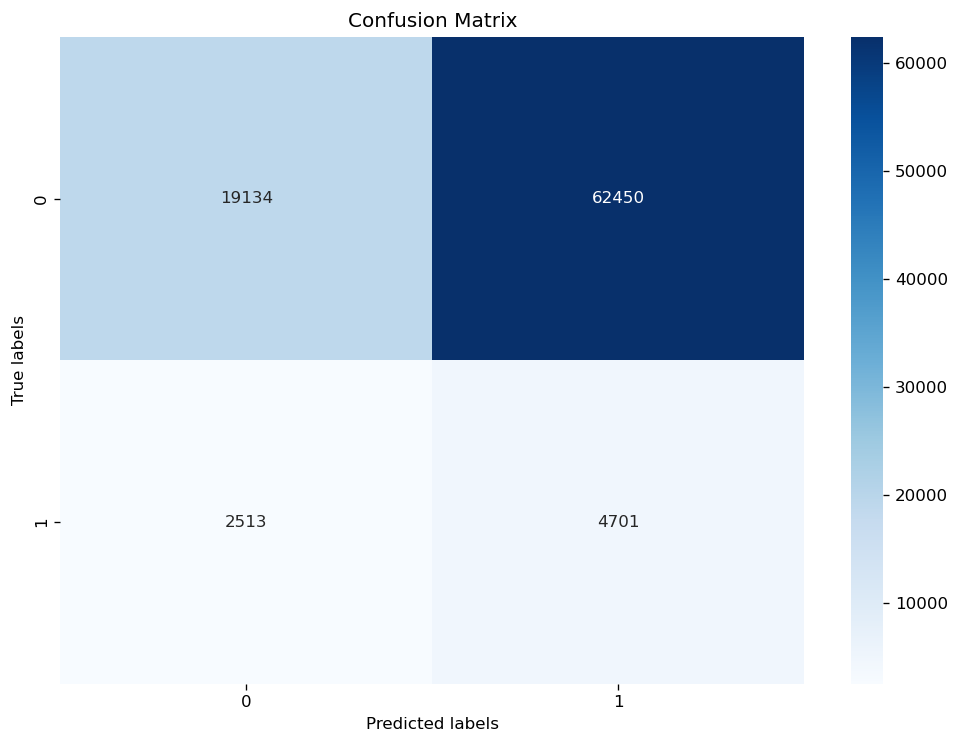

In [917]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7),dpi=120)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## AUC ROC

In [918]:
y_prob = svc.predict_proba(X_test[train_cols])[:, 1]

In [919]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

In [920]:
roc_auc = auc(fpr, tpr)

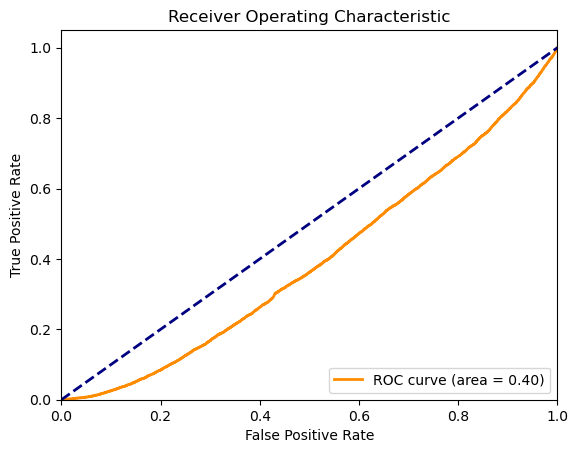

In [921]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

We still have the same error even after removing them, so let's try and deep dive on them vs the target

In [922]:
df_analysis = X_train.copy()

In [923]:
# Let's say pack_cols is a list of column names that were one-hot encoded
onehot_encoded_data = df_analysis[pack_cols].values

# Now inverse transform this data using the fitted OneHotEncoder
original_category = oneh.inverse_transform(onehot_encoded_data)

# Assign the result back to X_train as a single column (assuming the original feature was a single categorical feature)
df_analysis['PACK'] = original_category.flatten()

In [924]:
df_analysis = pd.merge(df_analysis,y_train,left_index=True,right_index =True)

In [925]:
grouped = df_analysis.groupby(['PACK','TARGET'])['TARGET'].count().to_frame().rename(columns = {'TARGET' : 'TARGET_COUNT'}).reset_index()

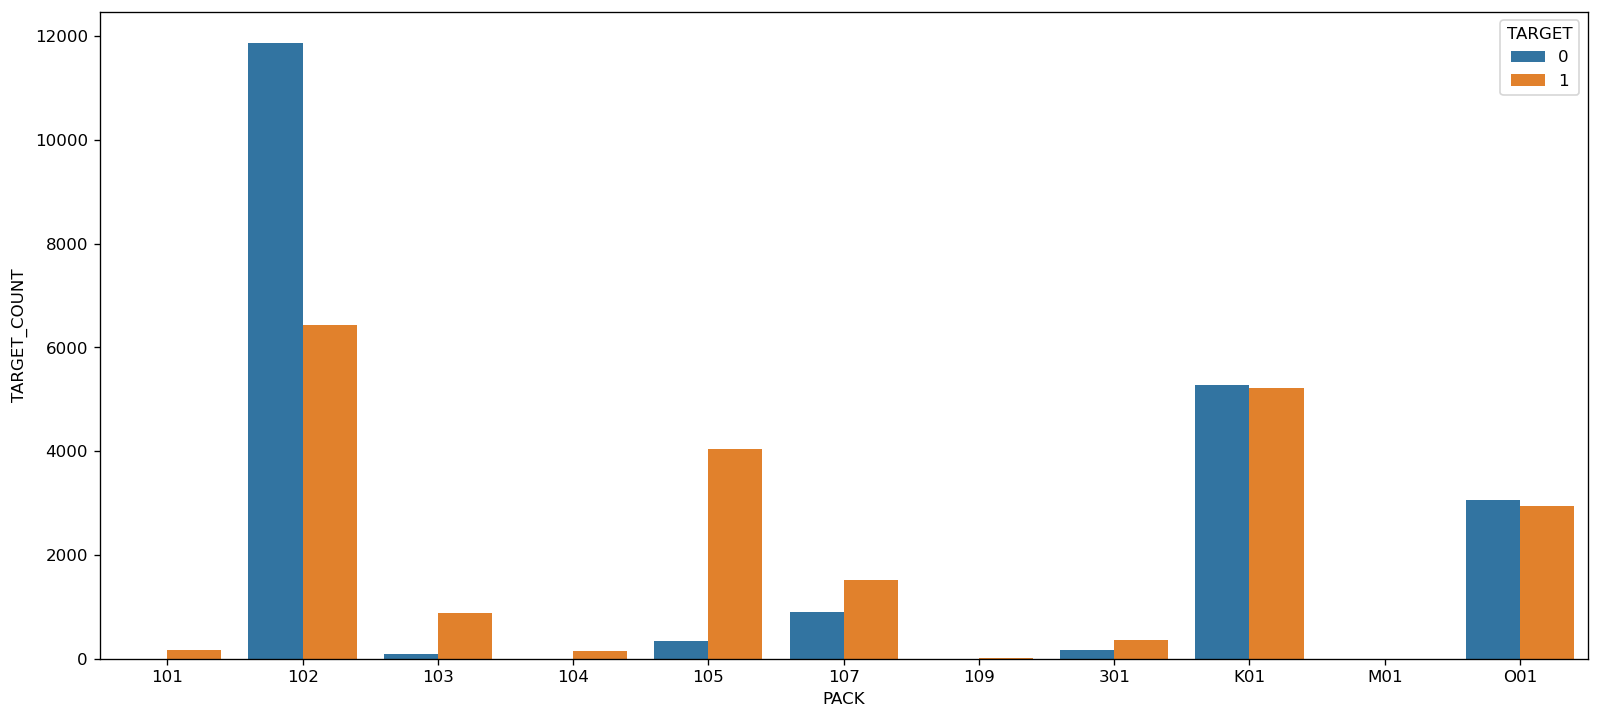

In [926]:
plt.figure(figsize=[16,7],dpi=120)
sns.barplot(grouped,x='PACK',y='TARGET_COUNT',hue='TARGET')
plt.show()

As we can see our data is very imbalanced for the PACK classes which can mean our model is overfitting towards more CHURN at some points. We will try to fix that by stratifying Our train test validation creation

In [927]:
# Create a new 'stratify_col' that combines the 'target' and 'category' columns
df['stratify_col'] = df['PACK'].astype(str) + "_" + df['TARGET'].astype(str)

### train test split

In [928]:
X_train,X_test,y_train,y_test = train_test_split(df[X_col],df[y_col],test_size= 0.25,stratify=df[['stratify_col']])

Let's start with the ones that are concentrated

In [929]:
def get_mode(series):
    if not series.mode().empty:
        s = series.mode().iloc[0]  
        return s
    else:
        return None

In [930]:
imputation_dict = {
 'AMOUNT_RUB_CLO_PRC' :  X_train.groupby('PACK')['AMOUNT_RUB_CLO_PRC'].apply(get_mode).to_dict(),
 'AMOUNT_RUB_NAS_PRC' :  X_train.groupby('PACK')['AMOUNT_RUB_NAS_PRC'].apply(get_mode).to_dict(),
 'TRANS_COUNT_NAS_PRC' : X_train.groupby('PACK')['TRANS_COUNT_NAS_PRC'].apply(get_mode).to_dict()
}

In [931]:
pack_list = list(df['PACK'].unique())
pack_list.remove('108')
pack_list.remove('M01')
for item in df['PACK'].unique():
    X_train.loc[X_train['PACK']== item,'AMOUNT_RUB_CLO_PRC'] = imputation_dict['AMOUNT_RUB_CLO_PRC'][item]
    X_train.loc[X_train['PACK']== item,'AMOUNT_RUB_NAS_PRC'] = imputation_dict['AMOUNT_RUB_NAS_PRC'][item]
    X_train.loc[X_train['PACK']== item,'TRANS_COUNT_NAS_PRC'] = imputation_dict['TRANS_COUNT_NAS_PRC'][item]
    X_test.loc[X_test['PACK']== item,'AMOUNT_RUB_CLO_PRC'] = imputation_dict['AMOUNT_RUB_CLO_PRC'][item]
    X_test.loc[X_test['PACK']== item,'AMOUNT_RUB_NAS_PRC'] = imputation_dict['AMOUNT_RUB_NAS_PRC'][item]
    X_test.loc[X_test['PACK']== item,'TRANS_COUNT_NAS_PRC'] = imputation_dict['TRANS_COUNT_NAS_PRC'][item]

amount_clo = X_train['AMOUNT_RUB_CLO_PRC'].mode()[0]
amount_nas = X_train['AMOUNT_RUB_NAS_PRC'].mode()[0]
trans_nas = X_train['TRANS_COUNT_NAS_PRC'].mode()[0]
    
X_train['AMOUNT_RUB_CLO_PRC'].fillna(amount_clo,inplace = True)
X_train['AMOUNT_RUB_NAS_PRC'].fillna(amount_nas,inplace = True)
X_train['TRANS_COUNT_NAS_PRC'].fillna(trans_nas,inplace = True)
X_test['AMOUNT_RUB_CLO_PRC'].fillna(amount_clo,inplace = True)
X_test['AMOUNT_RUB_NAS_PRC'].fillna(amount_nas,inplace = True)
X_test['TRANS_COUNT_NAS_PRC'].fillna(trans_nas,inplace = True)

In [932]:
check = ['AMOUNT_RUB_CLO_PRC','AMOUNT_RUB_NAS_PRC','TRANS_COUNT_NAS_PRC']

In [933]:
X_train[check].isnull().sum()

AMOUNT_RUB_CLO_PRC     0
AMOUNT_RUB_NAS_PRC     0
TRANS_COUNT_NAS_PRC    0
dtype: int64

Let's go to the Skewed ones now

In [934]:
imputation_dict = {
 'AMOUNT_RUB_SUP_PRC' :  X_train.groupby('PACK')['AMOUNT_RUB_SUP_PRC'].median().to_dict(),
 'TRANS_COUNT_SUP_PRC' :  X_train.groupby('PACK')['TRANS_COUNT_SUP_PRC'].median().to_dict(),
 'TRANS_COUNT_ATM_PRC' : X_train.groupby('PACK')['TRANS_COUNT_ATM_PRC'].median().to_dict(),
 'AMOUNT_RUB_ATM_PRC' :  X_train.groupby('PACK')['AMOUNT_RUB_ATM_PRC'].median().to_dict(),
 'CNT_TRAN_ATM_TENDENCY1M' :  X_train.groupby('PACK')['CNT_TRAN_ATM_TENDENCY1M'].median().to_dict(),
 'SUM_TRAN_ATM_TENDENCY1M' :  X_train.groupby('PACK')['SUM_TRAN_ATM_TENDENCY1M'].median().to_dict()
}

In [935]:
pack_list = list(df['PACK'].unique())
pack_list.remove('108')
pack_list.remove('M01')
for item in df['PACK'].unique():
    X_train.loc[X_train['PACK']== item,'AMOUNT_RUB_SUP_PRC'] = imputation_dict['AMOUNT_RUB_SUP_PRC'][item]
    X_train.loc[X_train['PACK']== item,'TRANS_COUNT_SUP_PRC'] = imputation_dict['TRANS_COUNT_SUP_PRC'][item]
    X_train.loc[X_train['PACK']== item,'TRANS_COUNT_ATM_PRC'] = imputation_dict['TRANS_COUNT_ATM_PRC'][item]
    X_train.loc[X_train['PACK']== item,'AMOUNT_RUB_ATM_PRC'] = imputation_dict['AMOUNT_RUB_ATM_PRC'][item]
    X_train.loc[X_train['PACK']== item,'CNT_TRAN_ATM_TENDENCY1M'] = imputation_dict['CNT_TRAN_ATM_TENDENCY1M'][item]
    X_train.loc[X_train['PACK']== item,'SUM_TRAN_ATM_TENDENCY1M'] = imputation_dict['SUM_TRAN_ATM_TENDENCY1M'][item]
    X_test.loc[X_test['PACK']== item,'AMOUNT_RUB_SUP_PRC'] = imputation_dict['AMOUNT_RUB_SUP_PRC'][item]
    X_test.loc[X_test['PACK']== item,'TRANS_COUNT_SUP_PRC'] = imputation_dict['TRANS_COUNT_SUP_PRC'][item]
    X_test.loc[X_test['PACK']== item,'TRANS_COUNT_ATM_PRC'] = imputation_dict['TRANS_COUNT_ATM_PRC'][item]
    X_test.loc[X_test['PACK']== item,'AMOUNT_RUB_ATM_PRC'] = imputation_dict['AMOUNT_RUB_ATM_PRC'][item]
    X_test.loc[X_test['PACK']== item,'CNT_TRAN_ATM_TENDENCY1M'] = imputation_dict['CNT_TRAN_ATM_TENDENCY1M'][item]
    X_test.loc[X_test['PACK']== item,'SUM_TRAN_ATM_TENDENCY1M'] = imputation_dict['SUM_TRAN_ATM_TENDENCY1M'][item]

median_1 = X_train['AMOUNT_RUB_SUP_PRC'].median()
median_2 = X_train['TRANS_COUNT_SUP_PRC'].median()
median_3 = X_train['TRANS_COUNT_ATM_PRC'].median()
median_4 = X_train['AMOUNT_RUB_ATM_PRC'].median()
median_5 = X_train['CNT_TRAN_ATM_TENDENCY1M'].median()
median_6 = X_train['SUM_TRAN_ATM_TENDENCY1M'].median()
    
X_train['AMOUNT_RUB_SUP_PRC'].fillna(median_1,inplace = True)
X_train['TRANS_COUNT_SUP_PRC'].fillna(median_2,inplace = True)
X_train['TRANS_COUNT_ATM_PRC'].fillna(median_3,inplace = True)
X_train['AMOUNT_RUB_ATM_PRC'].fillna(median_4,inplace = True)
X_train['CNT_TRAN_ATM_TENDENCY1M'].fillna(median_5,inplace = True)
X_train['SUM_TRAN_ATM_TENDENCY1M'].fillna(median_6,inplace = True)
X_test['AMOUNT_RUB_SUP_PRC'].fillna(median_1,inplace = True)
X_test['TRANS_COUNT_SUP_PRC'].fillna(median_2,inplace = True)
X_test['TRANS_COUNT_ATM_PRC'].fillna(median_3,inplace = True)
X_test['AMOUNT_RUB_ATM_PRC'].fillna(median_4,inplace = True)
X_test['CNT_TRAN_ATM_TENDENCY1M'].fillna(median_5,inplace = True)
X_test['SUM_TRAN_ATM_TENDENCY1M'].fillna(median_6,inplace = True)

In [936]:
check = ['AMOUNT_RUB_SUP_PRC'
,'TRANS_COUNT_SUP_PRC'
,'TRANS_COUNT_ATM_PRC'
,'AMOUNT_RUB_ATM_PRC'
,'CNT_TRAN_ATM_TENDENCY1M'
,'SUM_TRAN_ATM_TENDENCY1M']

In [937]:
X_train[check].isnull().sum()

AMOUNT_RUB_SUP_PRC         0
TRANS_COUNT_SUP_PRC        0
TRANS_COUNT_ATM_PRC        0
AMOUNT_RUB_ATM_PRC         0
CNT_TRAN_ATM_TENDENCY1M    0
SUM_TRAN_ATM_TENDENCY1M    0
dtype: int64

Let's go to the Normal ones ones now

In [938]:
null_cols

['AMOUNT_RUB_CLO_PRC',
 'AMOUNT_RUB_SUP_PRC',
 'AMOUNT_RUB_NAS_PRC',
 'TRANS_COUNT_SUP_PRC',
 'TRANS_COUNT_NAS_PRC',
 'TRANS_COUNT_ATM_PRC',
 'AMOUNT_RUB_ATM_PRC',
 'CNT_TRAN_SUP_TENDENCY3M',
 'SUM_TRAN_SUP_TENDENCY3M',
 'CNT_TRAN_ATM_TENDENCY3M',
 'CNT_TRAN_ATM_TENDENCY1M',
 'SUM_TRAN_ATM_TENDENCY3M',
 'SUM_TRAN_ATM_TENDENCY1M',
 'TRANS_AMOUNT_TENDENCY3M',
 'TRANS_CNT_TENDENCY3M']

In [939]:
imputation_dict = {
 'CNT_TRAN_SUP_TENDENCY3M' :  X_train.groupby('PACK')['CNT_TRAN_SUP_TENDENCY3M'].mean().to_dict(),
 'SUM_TRAN_SUP_TENDENCY3M' :  X_train.groupby('PACK')['SUM_TRAN_SUP_TENDENCY3M'].mean().to_dict(),
 'CNT_TRAN_ATM_TENDENCY3M' : X_train.groupby('PACK') ['CNT_TRAN_ATM_TENDENCY3M'].mean().to_dict(),
 'AMOUNT_RUB_ATM_PRC' :  X_train.groupby('PACK')['AMOUNT_RUB_ATM_PRC'].mean().to_dict(),
 'SUM_TRAN_ATM_TENDENCY3M' :  X_train.groupby('PACK')['SUM_TRAN_ATM_TENDENCY3M'].mean().to_dict(),
 'TRANS_AMOUNT_TENDENCY3M' :  X_train.groupby('PACK')['TRANS_AMOUNT_TENDENCY3M'].mean().to_dict(),
 'TRANS_CNT_TENDENCY3M' :  X_train.groupby('PACK')['TRANS_CNT_TENDENCY3M'].mean().to_dict()
}

In [940]:
pack_list = list(df['PACK'].unique())
pack_list.remove('108')
pack_list.remove('M01')
for item in df['PACK'].unique():
    X_train.loc[X_train['PACK']== item,'CNT_TRAN_SUP_TENDENCY3M'] = imputation_dict['CNT_TRAN_SUP_TENDENCY3M'][item]
    X_train.loc[X_train['PACK']== item,'SUM_TRAN_SUP_TENDENCY3M'] = imputation_dict['SUM_TRAN_SUP_TENDENCY3M'][item]
    X_train.loc[X_train['PACK']== item,'CNT_TRAN_ATM_TENDENCY3M'] = imputation_dict['CNT_TRAN_ATM_TENDENCY3M'][item]
    X_train.loc[X_train['PACK']== item,'AMOUNT_RUB_ATM_PRC'] = imputation_dict['AMOUNT_RUB_ATM_PRC'][item]
    X_train.loc[X_train['PACK']== item,'SUM_TRAN_ATM_TENDENCY3M'] = imputation_dict['SUM_TRAN_ATM_TENDENCY3M'][item]
    X_train.loc[X_train['PACK']== item,'TRANS_AMOUNT_TENDENCY3M'] = imputation_dict['TRANS_AMOUNT_TENDENCY3M'][item]
    X_train.loc[X_train['PACK']== item,'TRANS_CNT_TENDENCY3M'] = imputation_dict['TRANS_CNT_TENDENCY3M'][item]
    X_test.loc[X_test['PACK']== item,'CNT_TRAN_SUP_TENDENCY3M'] = imputation_dict['CNT_TRAN_SUP_TENDENCY3M'][item]
    X_test.loc[X_test['PACK']== item,'SUM_TRAN_SUP_TENDENCY3M'] = imputation_dict['SUM_TRAN_SUP_TENDENCY3M'][item]
    X_test.loc[X_test['PACK']== item,'CNT_TRAN_ATM_TENDENCY3M'] = imputation_dict['CNT_TRAN_ATM_TENDENCY3M'][item]
    X_test.loc[X_test['PACK']== item,'AMOUNT_RUB_ATM_PRC'] = imputation_dict['AMOUNT_RUB_ATM_PRC'][item]
    X_test.loc[X_test['PACK']== item,'SUM_TRAN_ATM_TENDENCY3M'] = imputation_dict['SUM_TRAN_ATM_TENDENCY3M'][item]
    X_test.loc[X_test['PACK']== item,'TRANS_AMOUNT_TENDENCY3M'] = imputation_dict['TRANS_AMOUNT_TENDENCY3M'][item]
    X_test.loc[X_test['PACK']== item,'TRANS_CNT_TENDENCY3M'] = imputation_dict['TRANS_CNT_TENDENCY3M'][item]

mean_1 = X_train['CNT_TRAN_SUP_TENDENCY3M'].mean()
mean_2 = X_train['SUM_TRAN_SUP_TENDENCY3M'].mean()
mean_3 = X_train['CNT_TRAN_ATM_TENDENCY3M'].mean()
mean_4 = X_train['AMOUNT_RUB_ATM_PRC'].mean()
mean_5 = X_train['SUM_TRAN_ATM_TENDENCY3M'].mean()
mean_6 = X_train['TRANS_AMOUNT_TENDENCY3M'].mean()
mean_7 = X_train['TRANS_CNT_TENDENCY3M'].mean()
    
X_train['CNT_TRAN_SUP_TENDENCY3M'].fillna(mean_1,inplace = True)
X_train['SUM_TRAN_SUP_TENDENCY3M'].fillna(mean_2,inplace = True)
X_train['CNT_TRAN_ATM_TENDENCY3M'].fillna(mean_3,inplace = True)
X_train['AMOUNT_RUB_ATM_PRC'].fillna(mean_4,inplace = True)
X_train['SUM_TRAN_ATM_TENDENCY3M'].fillna(mean_5,inplace = True)
X_train['TRANS_AMOUNT_TENDENCY3M'].fillna(mean_6,inplace = True)
X_train['TRANS_CNT_TENDENCY3M'].fillna(mean_7,inplace = True)
X_test['CNT_TRAN_SUP_TENDENCY3M'].fillna(mean_1,inplace = True)
X_test['SUM_TRAN_SUP_TENDENCY3M'].fillna(mean_2,inplace = True)
X_test['CNT_TRAN_ATM_TENDENCY3M'].fillna(mean_3,inplace = True)
X_test['AMOUNT_RUB_ATM_PRC'].fillna(mean_4,inplace = True)
X_test['SUM_TRAN_ATM_TENDENCY3M'].fillna(mean_5,inplace = True)
X_test['TRANS_AMOUNT_TENDENCY3M'].fillna(mean_6,inplace = True)
X_test['TRANS_CNT_TENDENCY3M'].fillna(mean_7,inplace = True)

In [941]:
check = ['CNT_TRAN_SUP_TENDENCY3M'
,'SUM_TRAN_SUP_TENDENCY3M'
,'CNT_TRAN_ATM_TENDENCY3M'
,'AMOUNT_RUB_ATM_PRC'
,'SUM_TRAN_ATM_TENDENCY3M'
,'TRANS_AMOUNT_TENDENCY3M'
,'TRANS_CNT_TENDENCY3M']

In [942]:
X_train[check].isnull().sum()

CNT_TRAN_SUP_TENDENCY3M    0
SUM_TRAN_SUP_TENDENCY3M    0
CNT_TRAN_ATM_TENDENCY3M    0
AMOUNT_RUB_ATM_PRC         0
SUM_TRAN_ATM_TENDENCY3M    0
TRANS_AMOUNT_TENDENCY3M    0
TRANS_CNT_TENDENCY3M       0
dtype: int64

We have to apply Onehot to the categorical, otherwise Standard Scaler won't work

In [943]:
oneh = OneHotEncoder(sparse_output=False)
oneh.fit(X_train[['PACK']])

OneHotEncoder(sparse_output=False)

In [944]:
col_names = oneh.get_feature_names_out()

In [945]:
X_train_dummies = pd.DataFrame(oneh.transform(X_train[['PACK']]),columns = col_names)
X_train_dummies.index = X_train.index
X_train = pd.merge(X_train,X_train_dummies,left_index=True,right_index=True)

X_test_dummies = pd.DataFrame(oneh.transform(X_test[['PACK']]),columns = col_names)
X_test_dummies.index = X_test.index
X_test = pd.merge(X_test,X_test_dummies,left_index=True,right_index=True)

In [946]:
X_train.drop(columns = 'PACK',inplace = True)
X_test.drop(columns = 'PACK',inplace = True)

Now to scale we are using the Standard Scaler

In [947]:
scaler = StandardScaler()

In [948]:
scaler.fit(X_train)

StandardScaler()

In [949]:
X_train_scaled = scaler.transform(X_train)
X_train = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)

In [950]:
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

Below we will create a list of columns that we will be using

In [951]:
cols_to_use = ['CR_PROD_CNT_IL', 'TURNOVER_DYNAMIC_IL_1M', 'REST_DYNAMIC_FDEP_1M',
       'REST_AVG_CUR', 'CR_PROD_CNT_PIL', 'TRANS_COUNT_ATM_PRC', 'AGE',
       'REST_DYNAMIC_IL_1M', 'REST_DYNAMIC_CUR_1M', 'REST_AVG_PAYM',
       'CNT_TRAN_SUP_TENDENCY3M', 'REST_DYNAMIC_PAYM_3M',
       'CNT_TRAN_ATM_TENDENCY3M', 'CLNT_SETUP_TENOR', 'REST_DYNAMIC_CC_1M',
       'PACK_101', 'PACK_102', 'PACK_103', 'PACK_104', 'PACK_105', 'PACK_107',
       'PACK_108', 'PACK_109', 'PACK_301', 'PACK_K01', 'PACK_M01', 'PACK_O01']

In [952]:
X_train = X_train[cols_to_use].copy()
X_test = X_test[cols_to_use].copy()

Let's use an Undersample Technique to make it better for logistic regression and SVM's to run, and with first set of columns.

- The Technique is Called NearMiss.

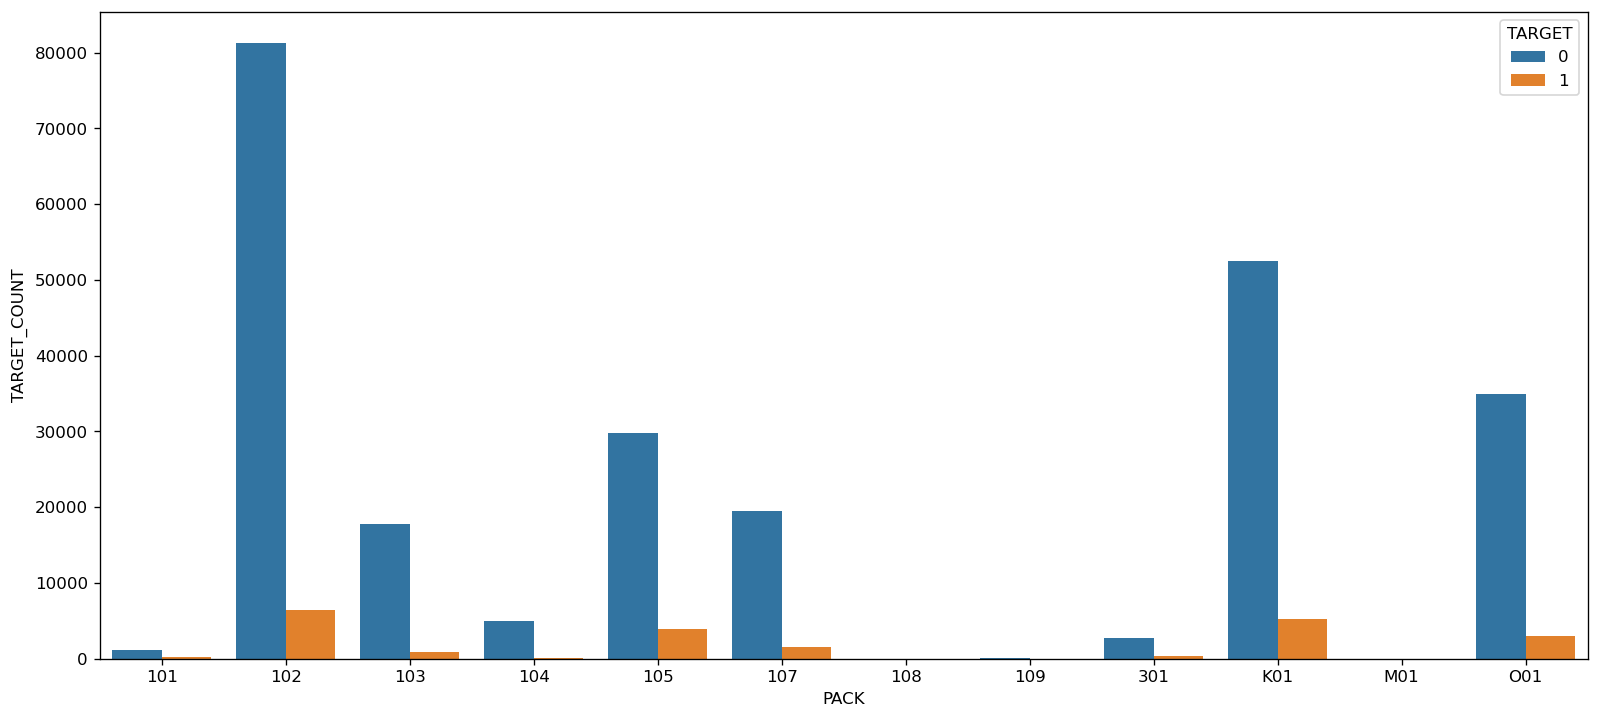

In [953]:
df_analysis = X_train.copy()

# Let's say pack_cols is a list of column names that were one-hot encoded
onehot_encoded_data = df_analysis[pack_cols].values

# Now inverse transform this data using the fitted OneHotEncoder
original_category = oneh.inverse_transform(onehot_encoded_data)

# Assign the result back to X_train as a single column (assuming the original feature was a single categorical feature)
df_analysis['PACK'] = original_category.flatten()

df_analysis = pd.merge(df_analysis,y_train,left_index=True,right_index =True)

grouped = df_analysis.groupby(['PACK','TARGET'])['TARGET'].count().to_frame().rename(columns = {'TARGET' : 'TARGET_COUNT'}).reset_index()

plt.figure(figsize=[16,7],dpi=120)
sns.barplot(grouped,x='PACK',y='TARGET_COUNT',hue='TARGET')
plt.show()

In [954]:
from imblearn.under_sampling import RandomUnderSampler

# Define the undersampler
rus = RandomUnderSampler()

# Resample the dataset
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [955]:
y_resampled = y_resampled.to_frame()

In [956]:
y_resampled.groupby(['TARGET']).size()

TARGET
0    21693
1    21693
dtype: int64

Let's check again with the stratified sample of our train test

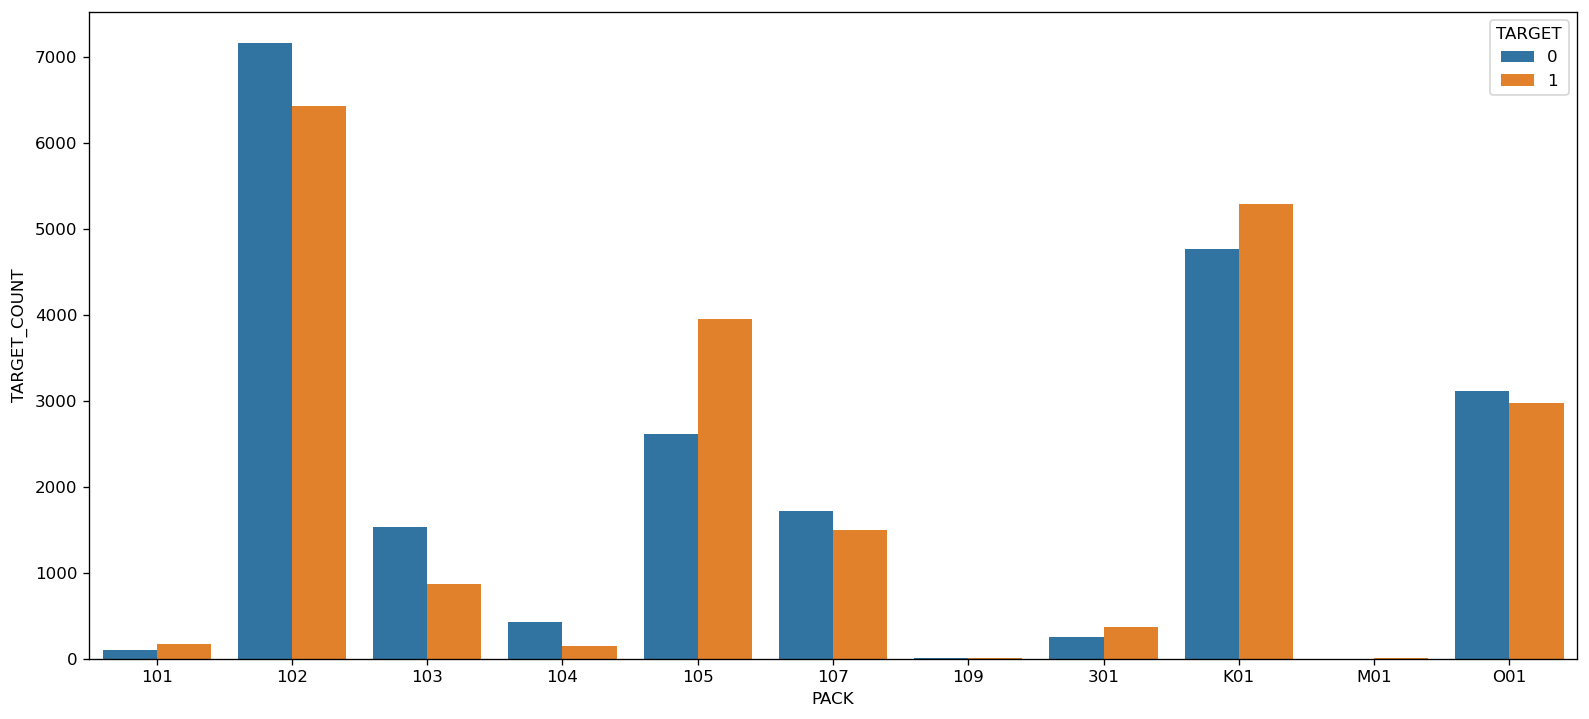

In [957]:
df_analysis = X_resampled.copy()

# Let's say pack_cols is a list of column names that were one-hot encoded
onehot_encoded_data = df_analysis[pack_cols].values

# Now inverse transform this data using the fitted OneHotEncoder
original_category = oneh.inverse_transform(onehot_encoded_data)

# Assign the result back to X_train as a single column (assuming the original feature was a single categorical feature)
df_analysis['PACK'] = original_category.flatten()

df_analysis = pd.merge(df_analysis,y_resampled,left_index=True,right_index =True)

grouped = df_analysis.groupby(['PACK','TARGET'])['TARGET'].count().to_frame().rename(columns = {'TARGET' : 'TARGET_COUNT'}).reset_index()

plt.figure(figsize=[16,7],dpi=120)
sns.barplot(grouped,x='PACK',y='TARGET_COUNT',hue='TARGET')
plt.show()

It seems better with the random undersampler but it still is a little Imbalanced for classes such as 105, or 301 or K01

In [958]:
X_train = X_resampled
y_train = y_resampled

## Logistic Regression

In [959]:
# Starting Logistic Regression
logr = LogisticRegression()

#Fitting Logistic Regression
logr.fit(X_train,y_train)

#Printing errors
print('Accuracy of training is '+ str(accuracy_score(y_train,logr.predict(X_train))))
print('Precision of training is '+ str(precision_score(y_train,logr.predict(X_train))))
print('Recall of training is '+ str(recall_score(y_train,logr.predict(X_train))))
print('F1 of training is '+ str(f1_score(y_train,logr.predict(X_train))))
print('ROC AUC of training is '+ str(roc_auc_score(y_train,logr.predict(X_train))))
print()
print('Accuracy of test is '+ str(accuracy_score(y_test,logr.predict(X_test))))
print('Precision of test is '+ str(precision_score(y_test,logr.predict(X_test))))
print('Recall of test is '+ str(recall_score(y_test,logr.predict(X_test))))
print('F1 of test is '+ str(f1_score(y_test,logr.predict(X_test))))
print('ROC AUC of test is '+ str(roc_auc_score(y_test,logr.predict(X_test))))

Accuracy of training is 0.6397455400359563
Precision of training is 0.6173589872633657
Recall of training is 0.7351219287327709
F1 of training is 0.6711135426310917
ROC AUC of training is 0.6397455400359563

Accuracy of test is 0.5597873825987072
Precision of test is 0.12474085940444779
Recall of test is 0.7321626106194691
F1 of test is 0.21316425120772947
ROC AUC of test is 0.6383332240013462


## Support Vector Machine

In [960]:
# Starting SVM
svc = SVC(probability=True)

#Fitting SVM
svc.fit(X_train,y_train)

#Printing errors
print('Accuracy of training is '+ str(accuracy_score(y_train,svc.predict(X_train))))
print('Precision of training is '+ str(precision_score(y_train,svc.predict(X_train))))
print('Recall of training is '+ str(recall_score(y_train,svc.predict(X_train))))
print('F1 of training is '+ str(f1_score(y_train,svc.predict(X_train))))
print('ROC AUC of training is '+ str(roc_auc_score(y_train,svc.predict(X_train))))
print()
print('Accuracy of test is '+ str(accuracy_score(y_test,svc.predict(X_test))))
print('Precision of test is '+ str(precision_score(y_test,svc.predict(X_test))))
print('Recall of test is '+ str(recall_score(y_test,svc.predict(X_test))))
print('F1 of test is '+ str(f1_score(y_test,svc.predict(X_test))))
print('ROC AUC of test is '+ str(roc_auc_score(y_test,svc.predict(X_test))))

Accuracy of training is 0.6723136495643756
Precision of training is 0.6458447132266875
Recall of training is 0.7630572073940902
F1 of training is 0.6995752593876128
ROC AUC of training is 0.6723136495643756

Accuracy of test is 0.5860492353431384
Precision of test is 0.13531940121535496
Recall of test is 0.7574668141592921
F1 of test is 0.22961814142599657
ROC AUC of test is 0.6641587068368978


### confusion matrix

In [961]:
cm = confusion_matrix(y_test,svc.predict(X_test))

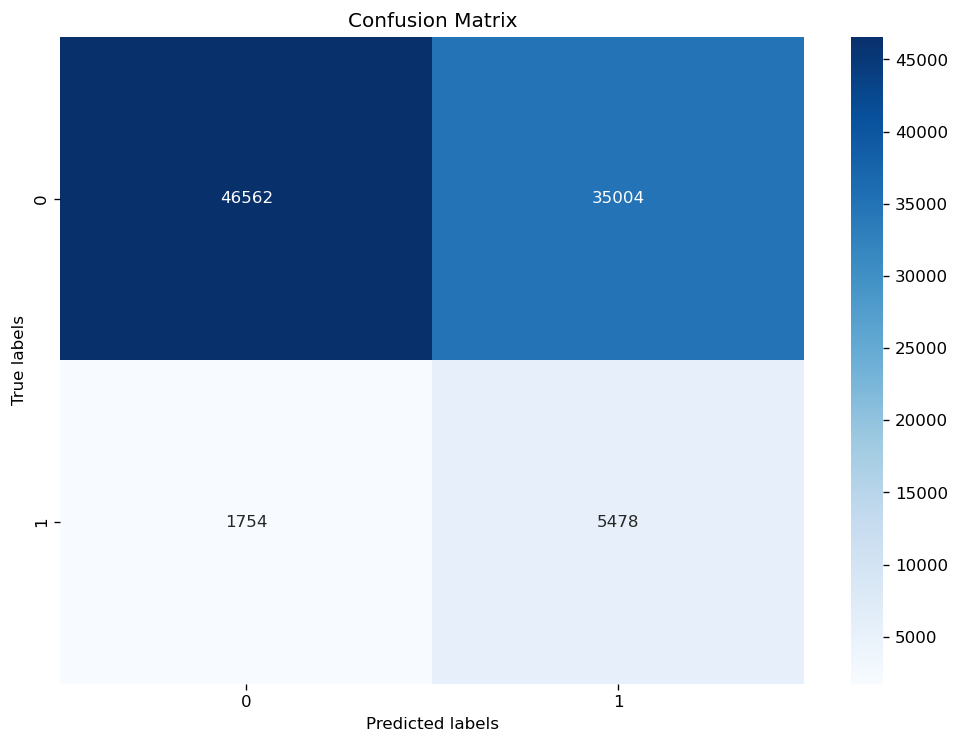

In [962]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7),dpi=120)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## AUC ROC

In [963]:
y_prob = svc.predict_proba(X_test)[:, 1]

In [964]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

In [965]:
roc_auc = auc(fpr, tpr)

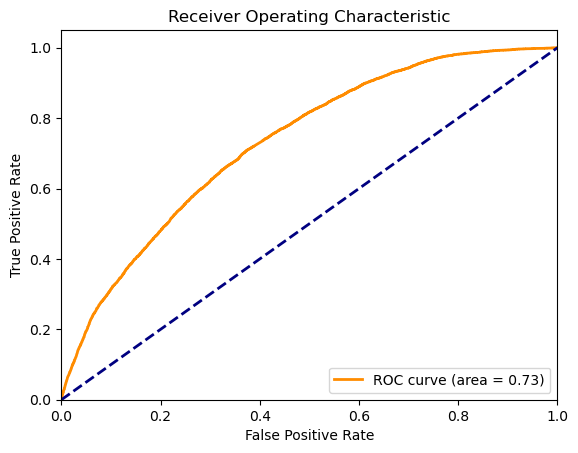

In [966]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

And we did get better results based on our previous ROC AUC which was 0.44 and now is 0.63. It still has room for improvements

Let's deep dive on CLNT_SETUP_TENOR which tells us how long the client has been a customer

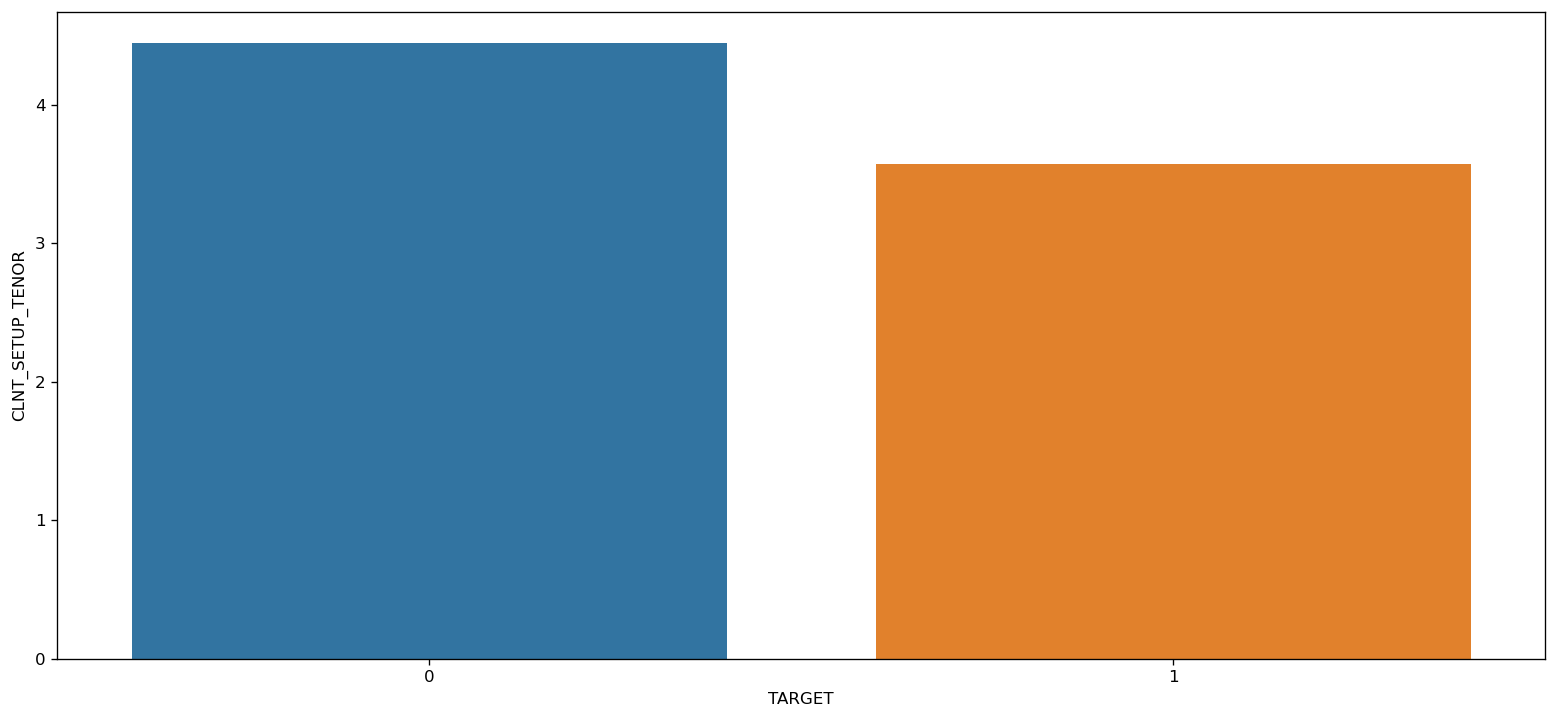

In [967]:
grouped = df.groupby(['TARGET'])['CLNT_SETUP_TENOR'].mean().to_frame().reset_index()

plt.figure(figsize=[16,7],dpi=120)
sns.barplot(grouped,x='TARGET',y='CLNT_SETUP_TENOR')
plt.show()

Being a customer for longer means that they have less chance of being a CHURN which seems to make sense, but let's see if there are any potential outliers that are making the variable prone to be biased

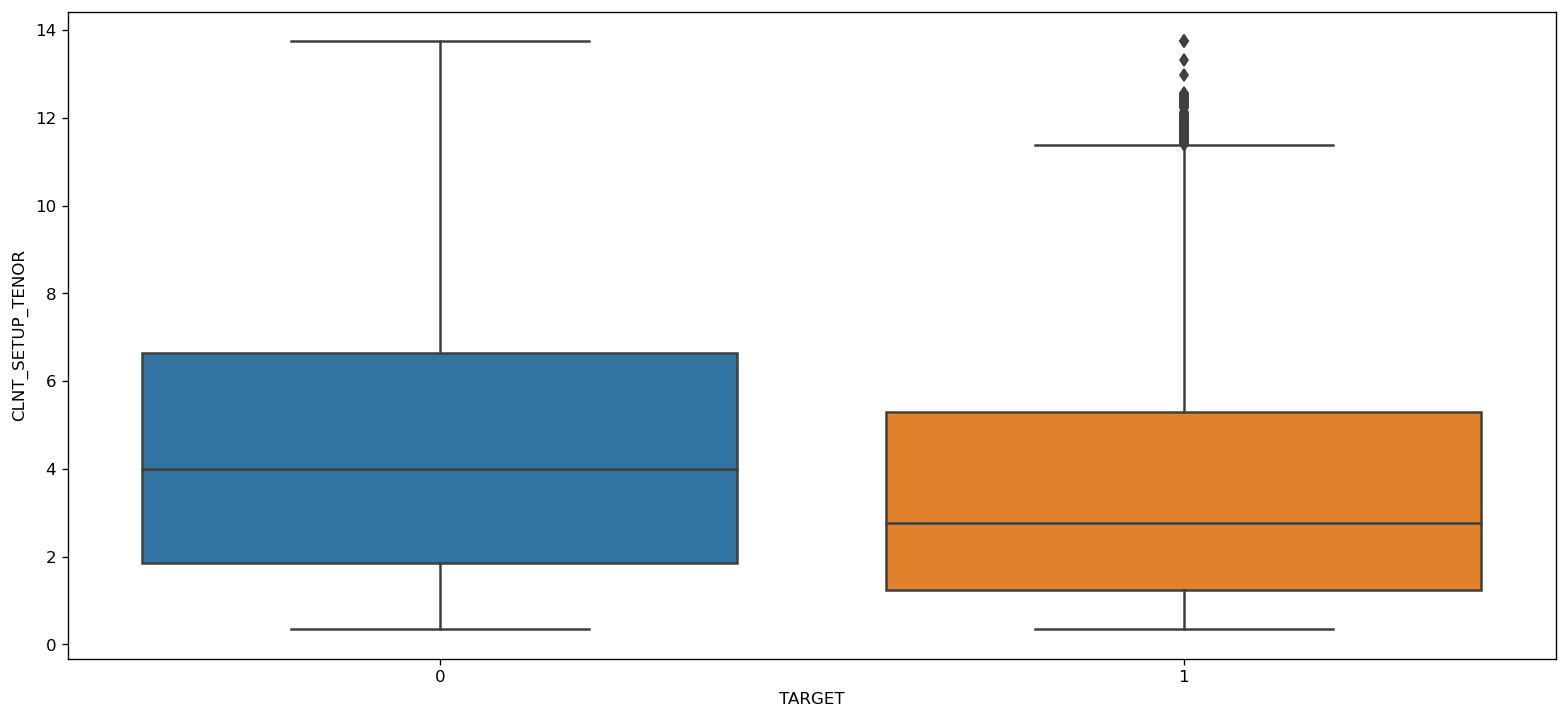

In [968]:
plt.figure(figsize=[16,7],dpi=120)
sns.boxplot(df,x='TARGET',y='CLNT_SETUP_TENOR')
plt.show()

We can see that there are a few outliers that could be biasing our model toward more months being churn, so what we can try to do is fix these outliers on class 1

train test split

In [969]:
X_train,X_test,y_train,y_test = train_test_split(df[X_col],df[y_col],test_size= 0.25,stratify=df[['stratify_col']])

Let's start with the ones that are concentrated

In [970]:
def get_mode(series):
    if not series.mode().empty:
        s = series.mode().iloc[0]  
        return s
    else:
        return None

In [971]:
imputation_dict = {
 'AMOUNT_RUB_CLO_PRC' :  X_train.groupby('PACK')['AMOUNT_RUB_CLO_PRC'].apply(get_mode).to_dict(),
 'AMOUNT_RUB_NAS_PRC' :  X_train.groupby('PACK')['AMOUNT_RUB_NAS_PRC'].apply(get_mode).to_dict(),
 'TRANS_COUNT_NAS_PRC' : X_train.groupby('PACK')['TRANS_COUNT_NAS_PRC'].apply(get_mode).to_dict()
}

In [972]:
pack_list = list(df['PACK'].unique())
pack_list.remove('108')
pack_list.remove('M01')
for item in df['PACK'].unique():
    X_train.loc[X_train['PACK']== item,'AMOUNT_RUB_CLO_PRC'] = imputation_dict['AMOUNT_RUB_CLO_PRC'][item]
    X_train.loc[X_train['PACK']== item,'AMOUNT_RUB_NAS_PRC'] = imputation_dict['AMOUNT_RUB_NAS_PRC'][item]
    X_train.loc[X_train['PACK']== item,'TRANS_COUNT_NAS_PRC'] = imputation_dict['TRANS_COUNT_NAS_PRC'][item]
    X_test.loc[X_test['PACK']== item,'AMOUNT_RUB_CLO_PRC'] = imputation_dict['AMOUNT_RUB_CLO_PRC'][item]
    X_test.loc[X_test['PACK']== item,'AMOUNT_RUB_NAS_PRC'] = imputation_dict['AMOUNT_RUB_NAS_PRC'][item]
    X_test.loc[X_test['PACK']== item,'TRANS_COUNT_NAS_PRC'] = imputation_dict['TRANS_COUNT_NAS_PRC'][item]

amount_clo = X_train['AMOUNT_RUB_CLO_PRC'].mode()[0]
amount_nas = X_train['AMOUNT_RUB_NAS_PRC'].mode()[0]
trans_nas = X_train['TRANS_COUNT_NAS_PRC'].mode()[0]
    
X_train['AMOUNT_RUB_CLO_PRC'].fillna(amount_clo,inplace = True)
X_train['AMOUNT_RUB_NAS_PRC'].fillna(amount_nas,inplace = True)
X_train['TRANS_COUNT_NAS_PRC'].fillna(trans_nas,inplace = True)
X_test['AMOUNT_RUB_CLO_PRC'].fillna(amount_clo,inplace = True)
X_test['AMOUNT_RUB_NAS_PRC'].fillna(amount_nas,inplace = True)
X_test['TRANS_COUNT_NAS_PRC'].fillna(trans_nas,inplace = True)

In [973]:
check = ['AMOUNT_RUB_CLO_PRC','AMOUNT_RUB_NAS_PRC','TRANS_COUNT_NAS_PRC']

In [974]:
X_train[check].isnull().sum()

AMOUNT_RUB_CLO_PRC     0
AMOUNT_RUB_NAS_PRC     0
TRANS_COUNT_NAS_PRC    0
dtype: int64

Let's go to the Skewed ones now

In [975]:
imputation_dict = {
 'AMOUNT_RUB_SUP_PRC' :  X_train.groupby('PACK')['AMOUNT_RUB_SUP_PRC'].median().to_dict(),
 'TRANS_COUNT_SUP_PRC' :  X_train.groupby('PACK')['TRANS_COUNT_SUP_PRC'].median().to_dict(),
 'TRANS_COUNT_ATM_PRC' : X_train.groupby('PACK')['TRANS_COUNT_ATM_PRC'].median().to_dict(),
 'AMOUNT_RUB_ATM_PRC' :  X_train.groupby('PACK')['AMOUNT_RUB_ATM_PRC'].median().to_dict(),
 'CNT_TRAN_ATM_TENDENCY1M' :  X_train.groupby('PACK')['CNT_TRAN_ATM_TENDENCY1M'].median().to_dict(),
 'SUM_TRAN_ATM_TENDENCY1M' :  X_train.groupby('PACK')['SUM_TRAN_ATM_TENDENCY1M'].median().to_dict()
}

In [976]:
pack_list = list(df['PACK'].unique())
pack_list.remove('108')
pack_list.remove('M01')
for item in df['PACK'].unique():
    X_train.loc[X_train['PACK']== item,'AMOUNT_RUB_SUP_PRC'] = imputation_dict['AMOUNT_RUB_SUP_PRC'][item]
    X_train.loc[X_train['PACK']== item,'TRANS_COUNT_SUP_PRC'] = imputation_dict['TRANS_COUNT_SUP_PRC'][item]
    X_train.loc[X_train['PACK']== item,'TRANS_COUNT_ATM_PRC'] = imputation_dict['TRANS_COUNT_ATM_PRC'][item]
    X_train.loc[X_train['PACK']== item,'AMOUNT_RUB_ATM_PRC'] = imputation_dict['AMOUNT_RUB_ATM_PRC'][item]
    X_train.loc[X_train['PACK']== item,'CNT_TRAN_ATM_TENDENCY1M'] = imputation_dict['CNT_TRAN_ATM_TENDENCY1M'][item]
    X_train.loc[X_train['PACK']== item,'SUM_TRAN_ATM_TENDENCY1M'] = imputation_dict['SUM_TRAN_ATM_TENDENCY1M'][item]
    X_test.loc[X_test['PACK']== item,'AMOUNT_RUB_SUP_PRC'] = imputation_dict['AMOUNT_RUB_SUP_PRC'][item]
    X_test.loc[X_test['PACK']== item,'TRANS_COUNT_SUP_PRC'] = imputation_dict['TRANS_COUNT_SUP_PRC'][item]
    X_test.loc[X_test['PACK']== item,'TRANS_COUNT_ATM_PRC'] = imputation_dict['TRANS_COUNT_ATM_PRC'][item]
    X_test.loc[X_test['PACK']== item,'AMOUNT_RUB_ATM_PRC'] = imputation_dict['AMOUNT_RUB_ATM_PRC'][item]
    X_test.loc[X_test['PACK']== item,'CNT_TRAN_ATM_TENDENCY1M'] = imputation_dict['CNT_TRAN_ATM_TENDENCY1M'][item]
    X_test.loc[X_test['PACK']== item,'SUM_TRAN_ATM_TENDENCY1M'] = imputation_dict['SUM_TRAN_ATM_TENDENCY1M'][item]

median_1 = X_train['AMOUNT_RUB_SUP_PRC'].median()
median_2 = X_train['TRANS_COUNT_SUP_PRC'].median()
median_3 = X_train['TRANS_COUNT_ATM_PRC'].median()
median_4 = X_train['AMOUNT_RUB_ATM_PRC'].median()
median_5 = X_train['CNT_TRAN_ATM_TENDENCY1M'].median()
median_6 = X_train['SUM_TRAN_ATM_TENDENCY1M'].median()
    
X_train['AMOUNT_RUB_SUP_PRC'].fillna(median_1,inplace = True)
X_train['TRANS_COUNT_SUP_PRC'].fillna(median_2,inplace = True)
X_train['TRANS_COUNT_ATM_PRC'].fillna(median_3,inplace = True)
X_train['AMOUNT_RUB_ATM_PRC'].fillna(median_4,inplace = True)
X_train['CNT_TRAN_ATM_TENDENCY1M'].fillna(median_5,inplace = True)
X_train['SUM_TRAN_ATM_TENDENCY1M'].fillna(median_6,inplace = True)
X_test['AMOUNT_RUB_SUP_PRC'].fillna(median_1,inplace = True)
X_test['TRANS_COUNT_SUP_PRC'].fillna(median_2,inplace = True)
X_test['TRANS_COUNT_ATM_PRC'].fillna(median_3,inplace = True)
X_test['AMOUNT_RUB_ATM_PRC'].fillna(median_4,inplace = True)
X_test['CNT_TRAN_ATM_TENDENCY1M'].fillna(median_5,inplace = True)
X_test['SUM_TRAN_ATM_TENDENCY1M'].fillna(median_6,inplace = True)

In [977]:
check = ['AMOUNT_RUB_SUP_PRC'
,'TRANS_COUNT_SUP_PRC'
,'TRANS_COUNT_ATM_PRC'
,'AMOUNT_RUB_ATM_PRC'
,'CNT_TRAN_ATM_TENDENCY1M'
,'SUM_TRAN_ATM_TENDENCY1M']

In [978]:
X_train[check].isnull().sum()

AMOUNT_RUB_SUP_PRC         0
TRANS_COUNT_SUP_PRC        0
TRANS_COUNT_ATM_PRC        0
AMOUNT_RUB_ATM_PRC         0
CNT_TRAN_ATM_TENDENCY1M    0
SUM_TRAN_ATM_TENDENCY1M    0
dtype: int64

Let's go to the Normal ones ones now

In [979]:
imputation_dict = {
 'CNT_TRAN_SUP_TENDENCY3M' :  X_train.groupby('PACK')['CNT_TRAN_SUP_TENDENCY3M'].mean().to_dict(),
 'SUM_TRAN_SUP_TENDENCY3M' :  X_train.groupby('PACK')['SUM_TRAN_SUP_TENDENCY3M'].mean().to_dict(),
 'CNT_TRAN_ATM_TENDENCY3M' : X_train.groupby('PACK') ['CNT_TRAN_ATM_TENDENCY3M'].mean().to_dict(),
 'AMOUNT_RUB_ATM_PRC' :  X_train.groupby('PACK')['AMOUNT_RUB_ATM_PRC'].mean().to_dict(),
 'SUM_TRAN_ATM_TENDENCY3M' :  X_train.groupby('PACK')['SUM_TRAN_ATM_TENDENCY3M'].mean().to_dict(),
 'TRANS_AMOUNT_TENDENCY3M' :  X_train.groupby('PACK')['TRANS_AMOUNT_TENDENCY3M'].mean().to_dict(),
 'TRANS_CNT_TENDENCY3M' :  X_train.groupby('PACK')['TRANS_CNT_TENDENCY3M'].mean().to_dict()
}

In [980]:
pack_list = list(df['PACK'].unique())
pack_list.remove('108')
pack_list.remove('M01')
for item in df['PACK'].unique():
    X_train.loc[X_train['PACK']== item,'CNT_TRAN_SUP_TENDENCY3M'] = imputation_dict['CNT_TRAN_SUP_TENDENCY3M'][item]
    X_train.loc[X_train['PACK']== item,'SUM_TRAN_SUP_TENDENCY3M'] = imputation_dict['SUM_TRAN_SUP_TENDENCY3M'][item]
    X_train.loc[X_train['PACK']== item,'CNT_TRAN_ATM_TENDENCY3M'] = imputation_dict['CNT_TRAN_ATM_TENDENCY3M'][item]
    X_train.loc[X_train['PACK']== item,'AMOUNT_RUB_ATM_PRC'] = imputation_dict['AMOUNT_RUB_ATM_PRC'][item]
    X_train.loc[X_train['PACK']== item,'SUM_TRAN_ATM_TENDENCY3M'] = imputation_dict['SUM_TRAN_ATM_TENDENCY3M'][item]
    X_train.loc[X_train['PACK']== item,'TRANS_AMOUNT_TENDENCY3M'] = imputation_dict['TRANS_AMOUNT_TENDENCY3M'][item]
    X_train.loc[X_train['PACK']== item,'TRANS_CNT_TENDENCY3M'] = imputation_dict['TRANS_CNT_TENDENCY3M'][item]
    X_test.loc[X_test['PACK']== item,'CNT_TRAN_SUP_TENDENCY3M'] = imputation_dict['CNT_TRAN_SUP_TENDENCY3M'][item]
    X_test.loc[X_test['PACK']== item,'SUM_TRAN_SUP_TENDENCY3M'] = imputation_dict['SUM_TRAN_SUP_TENDENCY3M'][item]
    X_test.loc[X_test['PACK']== item,'CNT_TRAN_ATM_TENDENCY3M'] = imputation_dict['CNT_TRAN_ATM_TENDENCY3M'][item]
    X_test.loc[X_test['PACK']== item,'AMOUNT_RUB_ATM_PRC'] = imputation_dict['AMOUNT_RUB_ATM_PRC'][item]
    X_test.loc[X_test['PACK']== item,'SUM_TRAN_ATM_TENDENCY3M'] = imputation_dict['SUM_TRAN_ATM_TENDENCY3M'][item]
    X_test.loc[X_test['PACK']== item,'TRANS_AMOUNT_TENDENCY3M'] = imputation_dict['TRANS_AMOUNT_TENDENCY3M'][item]
    X_test.loc[X_test['PACK']== item,'TRANS_CNT_TENDENCY3M'] = imputation_dict['TRANS_CNT_TENDENCY3M'][item]

mean_1 = X_train['CNT_TRAN_SUP_TENDENCY3M'].mean()
mean_2 = X_train['SUM_TRAN_SUP_TENDENCY3M'].mean()
mean_3 = X_train['CNT_TRAN_ATM_TENDENCY3M'].mean()
mean_4 = X_train['AMOUNT_RUB_ATM_PRC'].mean()
mean_5 = X_train['SUM_TRAN_ATM_TENDENCY3M'].mean()
mean_6 = X_train['TRANS_AMOUNT_TENDENCY3M'].mean()
mean_7 = X_train['TRANS_CNT_TENDENCY3M'].mean()
    
X_train['CNT_TRAN_SUP_TENDENCY3M'].fillna(mean_1,inplace = True)
X_train['SUM_TRAN_SUP_TENDENCY3M'].fillna(mean_2,inplace = True)
X_train['CNT_TRAN_ATM_TENDENCY3M'].fillna(mean_3,inplace = True)
X_train['AMOUNT_RUB_ATM_PRC'].fillna(mean_4,inplace = True)
X_train['SUM_TRAN_ATM_TENDENCY3M'].fillna(mean_5,inplace = True)
X_train['TRANS_AMOUNT_TENDENCY3M'].fillna(mean_6,inplace = True)
X_train['TRANS_CNT_TENDENCY3M'].fillna(mean_7,inplace = True)
X_test['CNT_TRAN_SUP_TENDENCY3M'].fillna(mean_1,inplace = True)
X_test['SUM_TRAN_SUP_TENDENCY3M'].fillna(mean_2,inplace = True)
X_test['CNT_TRAN_ATM_TENDENCY3M'].fillna(mean_3,inplace = True)
X_test['AMOUNT_RUB_ATM_PRC'].fillna(mean_4,inplace = True)
X_test['SUM_TRAN_ATM_TENDENCY3M'].fillna(mean_5,inplace = True)
X_test['TRANS_AMOUNT_TENDENCY3M'].fillna(mean_6,inplace = True)
X_test['TRANS_CNT_TENDENCY3M'].fillna(mean_7,inplace = True)

In [981]:
check = ['CNT_TRAN_SUP_TENDENCY3M'
,'SUM_TRAN_SUP_TENDENCY3M'
,'CNT_TRAN_ATM_TENDENCY3M'
,'AMOUNT_RUB_ATM_PRC'
,'SUM_TRAN_ATM_TENDENCY3M'
,'TRANS_AMOUNT_TENDENCY3M'
,'TRANS_CNT_TENDENCY3M']

In [982]:
X_train[check].isnull().sum()

CNT_TRAN_SUP_TENDENCY3M    0
SUM_TRAN_SUP_TENDENCY3M    0
CNT_TRAN_ATM_TENDENCY3M    0
AMOUNT_RUB_ATM_PRC         0
SUM_TRAN_ATM_TENDENCY3M    0
TRANS_AMOUNT_TENDENCY3M    0
TRANS_CNT_TENDENCY3M       0
dtype: int64

### Treating outliers

In [983]:
Q1,Q3=np.percentile(X_train['CLNT_SETUP_TENOR'],[25,75])

In [984]:
IQR = Q3 - Q1

In [985]:
X_train = pd.merge(X_train,y_train,left_index = True,right_index = True)

In [986]:
X_train.loc[(X_train['CLNT_SETUP_TENOR']>= (IQR*2.1)) & (X_train['TARGET'] == 1),'CLNT_SETUP_TENOR']= IQR*2.1

In [987]:
X_train.drop(columns = 'TARGET',inplace = True)

In [988]:
df_analysis = pd.merge(X_train,y_train,left_index=True,right_index =True)

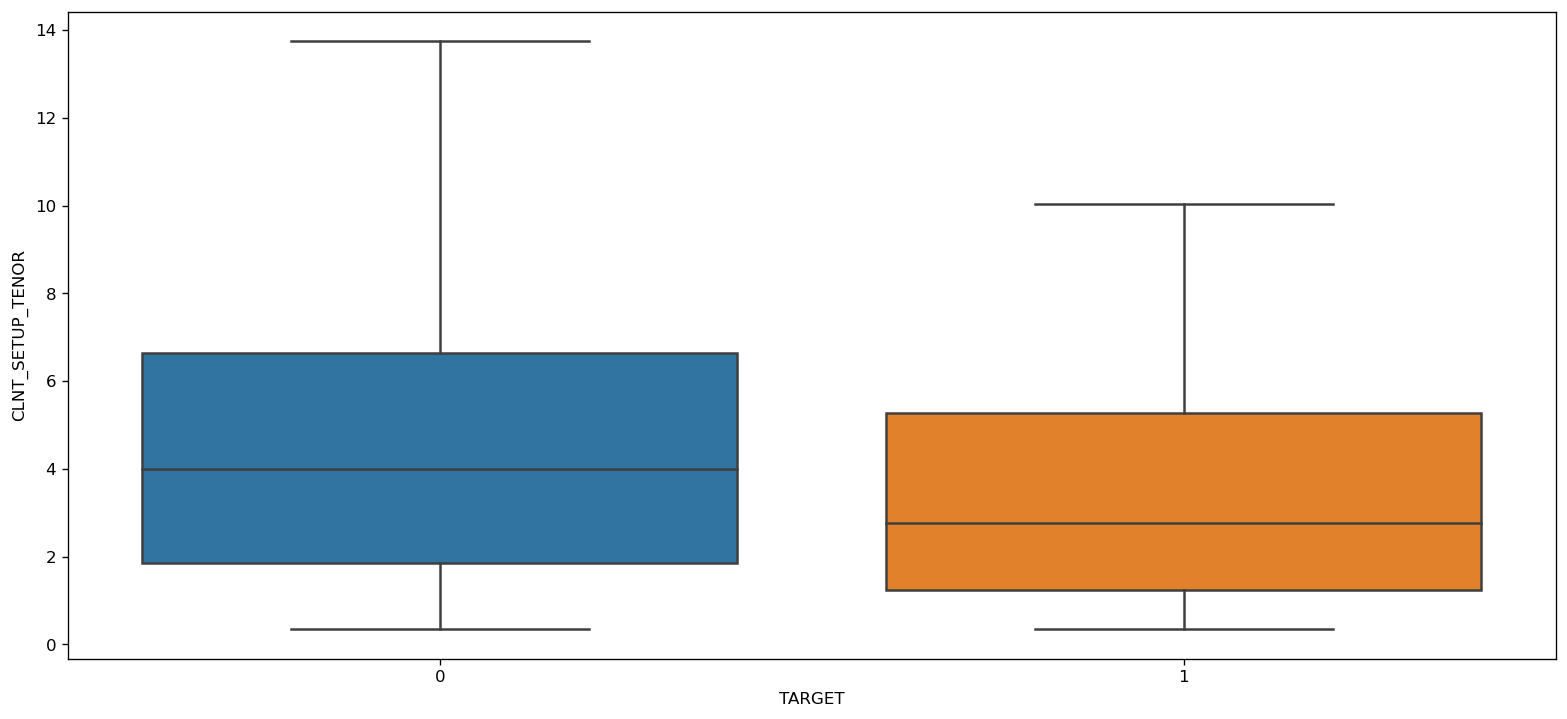

In [989]:
plt.figure(figsize=[16,7],dpi=120)
sns.boxplot(df_analysis,x='TARGET',y='CLNT_SETUP_TENOR')
plt.show()

## As we can see the outliers have been cleared for this column

We have to apply Onehot to the categorical, otherwise Standard Scaler won't work

In [990]:
oneh = OneHotEncoder(sparse_output=False)
oneh.fit(X_train[['PACK']])

OneHotEncoder(sparse_output=False)

In [991]:
col_names = oneh.get_feature_names_out()

In [992]:
X_train_dummies = pd.DataFrame(oneh.transform(X_train[['PACK']]),columns = col_names)
X_train_dummies.index = X_train.index
X_train = pd.merge(X_train,X_train_dummies,left_index=True,right_index=True)

X_test_dummies = pd.DataFrame(oneh.transform(X_test[['PACK']]),columns = col_names)
X_test_dummies.index = X_test.index
X_test = pd.merge(X_test,X_test_dummies,left_index=True,right_index=True)

In [993]:
X_train.drop(columns = 'PACK',inplace = True)
X_test.drop(columns = 'PACK',inplace = True)

Now to scale we are using the Standard Scaler

In [994]:
scaler = StandardScaler()

In [995]:
scaler.fit(X_train)

StandardScaler()

In [996]:
X_train_scaled = scaler.transform(X_train)
X_train = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)

In [997]:
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

Below we will create a list of columns that we will be using

In [998]:
cols_to_use = ['CR_PROD_CNT_IL', 'TURNOVER_DYNAMIC_IL_1M', 'REST_DYNAMIC_FDEP_1M',
       'REST_AVG_CUR', 'CR_PROD_CNT_PIL', 'TRANS_COUNT_ATM_PRC', 'AGE',
       'REST_DYNAMIC_IL_1M', 'REST_DYNAMIC_CUR_1M', 'REST_AVG_PAYM',
       'CNT_TRAN_SUP_TENDENCY3M', 'REST_DYNAMIC_PAYM_3M',
       'CNT_TRAN_ATM_TENDENCY3M', 'CLNT_SETUP_TENOR', 'REST_DYNAMIC_CC_1M',
       'PACK_101', 'PACK_102', 'PACK_103', 'PACK_104', 'PACK_105', 'PACK_107',
       'PACK_108', 'PACK_109', 'PACK_301', 'PACK_K01', 'PACK_M01', 'PACK_O01']

In [999]:
X_train = X_train[cols_to_use].copy()
X_test = X_test[cols_to_use].copy()

In [1000]:
from imblearn.under_sampling import RandomUnderSampler

# Define the undersampler
rus = RandomUnderSampler()

# Resample the dataset
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [1001]:
y_resampled = y_resampled.to_frame()

In [1002]:
y_resampled.groupby(['TARGET']).size()

TARGET
0    21693
1    21693
dtype: int64

In [1003]:
X_train = X_resampled
y_train = y_resampled

## Logistic Regression

In [1004]:
# Starting Logistic Regression
logr = LogisticRegression()

#Fitting Logistic Regression
logr.fit(X_train,y_train)

#Printing errors
print('Accuracy of training is '+ str(accuracy_score(y_train,logr.predict(X_train))))
print('Precision of training is '+ str(precision_score(y_train,logr.predict(X_train))))
print('Recall of training is '+ str(recall_score(y_train,logr.predict(X_train))))
print('F1 of training is '+ str(f1_score(y_train,logr.predict(X_train))))
print('ROC AUC of training is '+ str(roc_auc_score(y_train,logr.predict(X_train))))
print()
print('Accuracy of test is '+ str(accuracy_score(y_test,logr.predict(X_test))))
print('Precision of test is '+ str(precision_score(y_test,logr.predict(X_test))))
print('Recall of test is '+ str(recall_score(y_test,logr.predict(X_test))))
print('F1 of test is '+ str(f1_score(y_test,logr.predict(X_test))))
print('ROC AUC of test is '+ str(roc_auc_score(y_test,logr.predict(X_test))))

Accuracy of training is 0.6389618771032131
Precision of training is 0.6168999883662311
Recall of training is 0.7333241137694188
F1 of training is 0.6700926705981466
ROC AUC of training is 0.6389618771032131

Accuracy of test is 0.5617694092209284
Precision of test is 0.12485198692748543
Recall of test is 0.7289823008849557
F1 of test is 0.21319099033523395
ROC AUC of test is 0.6379629401587813


## Support Vector Machine

In [1005]:
# Starting SVM
svc = SVC(probability=True)

#Fitting SVM
svc.fit(X_train,y_train)

#Printing errors
print('Accuracy of training is '+ str(accuracy_score(y_train,svc.predict(X_train))))
print('Precision of training is '+ str(precision_score(y_train,svc.predict(X_train))))
print('Recall of training is '+ str(recall_score(y_train,svc.predict(X_train))))
print('F1 of training is '+ str(f1_score(y_train,svc.predict(X_train))))
print('ROC AUC of training is '+ str(roc_auc_score(y_train,svc.predict(X_train))))
print()
print('Accuracy of test is '+ str(accuracy_score(y_test,svc.predict(X_test))))
print('Precision of test is '+ str(precision_score(y_test,svc.predict(X_test))))
print('Recall of test is '+ str(recall_score(y_test,svc.predict(X_test))))
print('F1 of test is '+ str(f1_score(y_test,svc.predict(X_test))))
print('ROC AUC of test is '+ str(roc_auc_score(y_test,svc.predict(X_test))))

Accuracy of training is 0.6722675517448025
Precision of training is 0.6455104742621292
Recall of training is 0.7642096528834186
F1 of training is 0.6998627968337731
ROC AUC of training is 0.6722675517448025

Accuracy of test is 0.5874231401608144
Precision of test is 0.1360891089108911
Recall of test is 0.7602323008849557
F1 of test is 0.23085320792744374
ROC AUC of test is 0.6661667107249486


### confusion matrix

In [1006]:
cm = confusion_matrix(y_test,svc.predict(X_test))

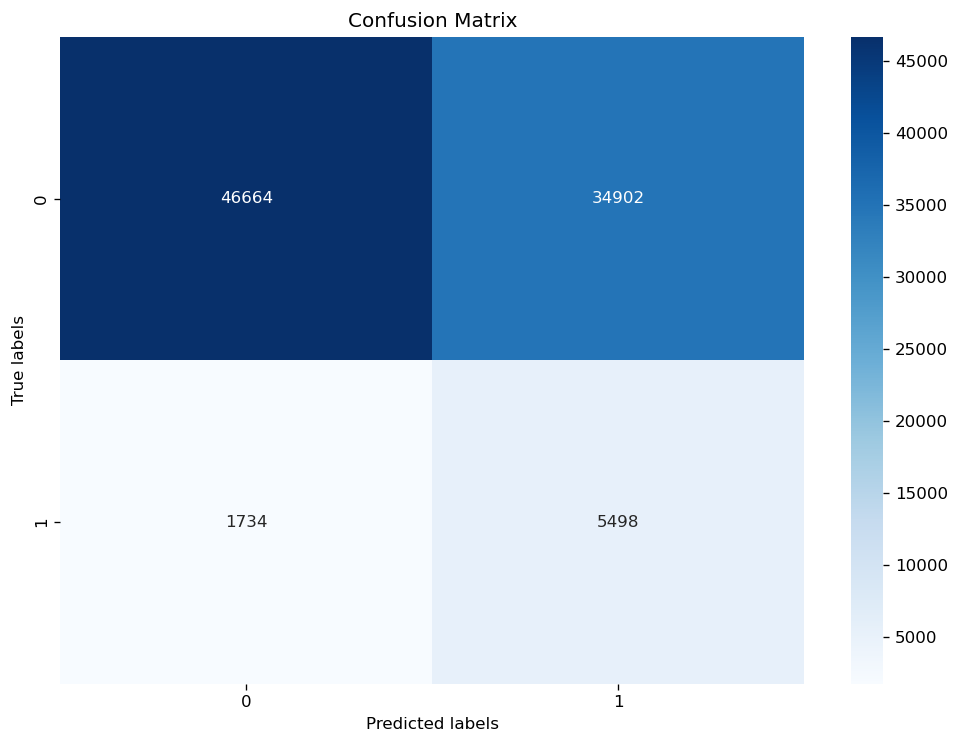

In [1007]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7),dpi=120)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### AUC ROC

In [1008]:
y_prob = svc.predict_proba(X_test)[:, 1]

In [1009]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

In [1010]:
roc_auc = auc(fpr, tpr)

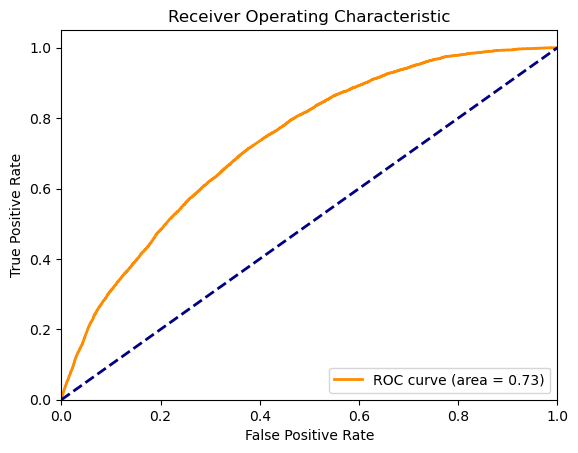

In [1011]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

So fixing the outliers of this variable did not seem to improve the model. Let's try to fix the other variable

Let's deep dive on <b>REST_AVG_CUR</b> which is the account balance

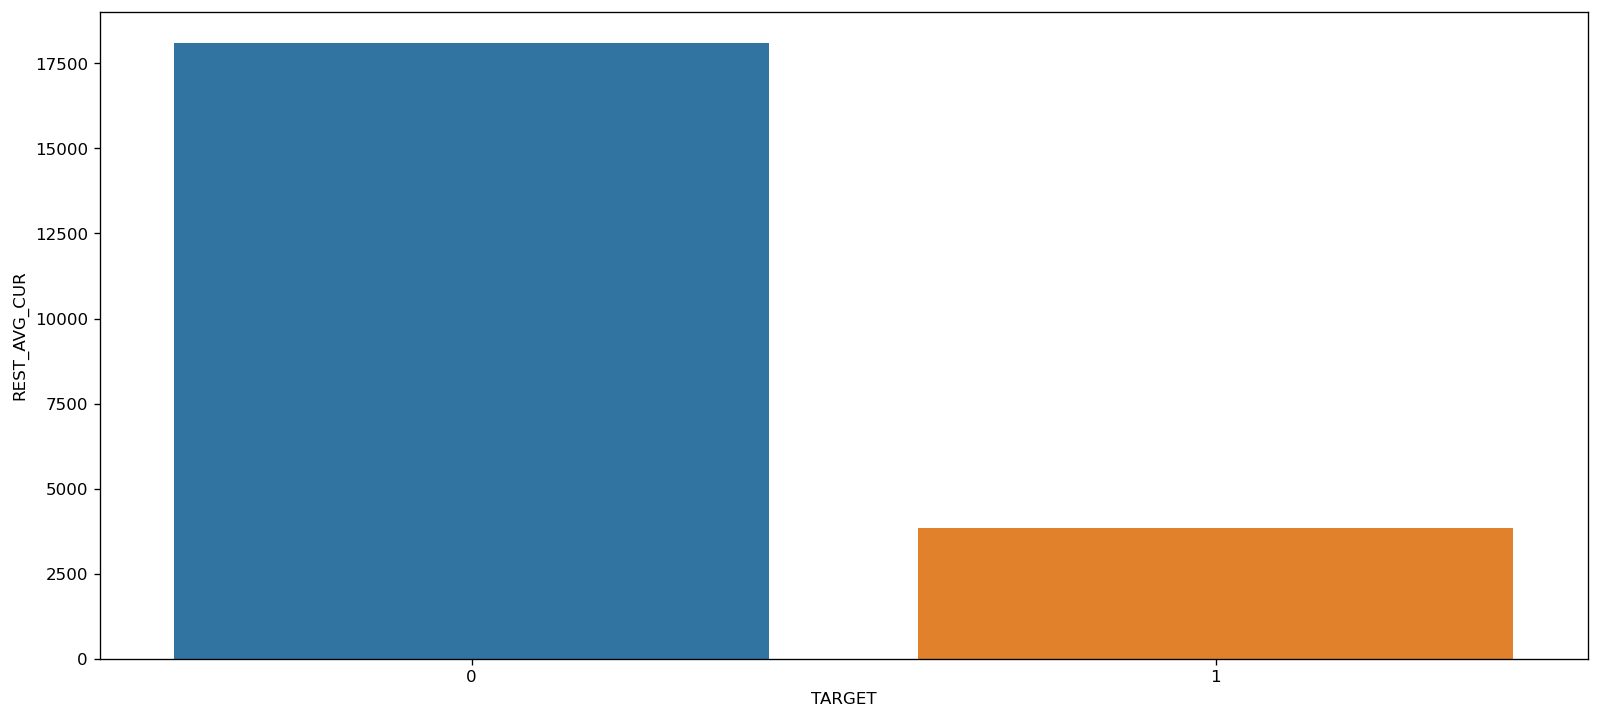

In [1012]:
grouped = df.groupby(['TARGET'])['REST_AVG_CUR'].median().to_frame().reset_index()

plt.figure(figsize=[16,7],dpi=120)
sns.barplot(grouped,x='TARGET',y='REST_AVG_CUR')
plt.show()

A client with lots of balance in the account is less prone to do churn as we can see above

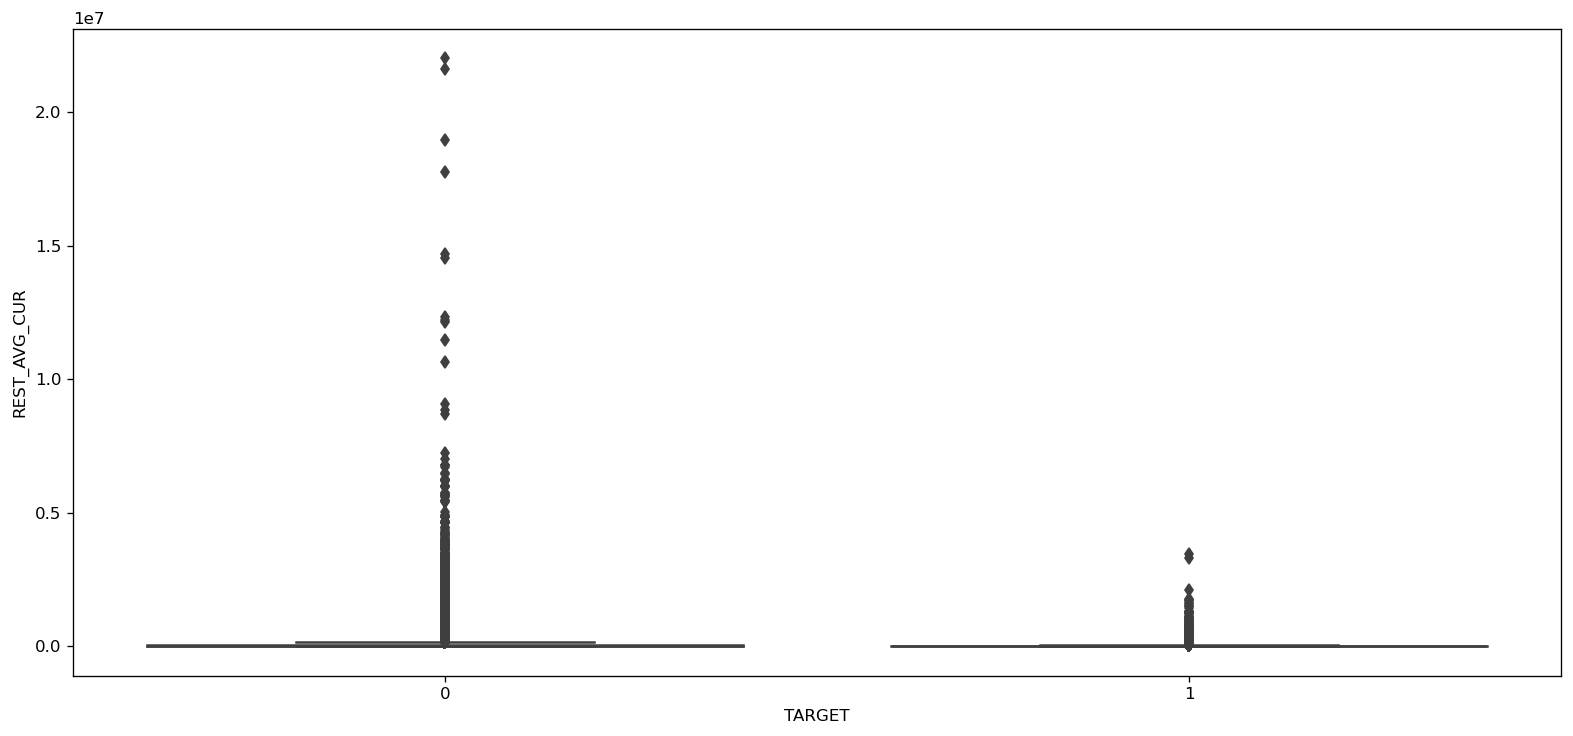

In [1013]:
plt.figure(figsize=[16,7],dpi=120)
sns.boxplot(df,x='TARGET',y='REST_AVG_CUR')
plt.show()

Let's try to fix the outliers of class 1 and see if that makes our prediction better

There are big outliers both in class 0 and 1

In [1014]:
X_train,X_test,y_train,y_test = train_test_split(df[X_col],df[y_col],test_size= 0.25,stratify=df[['stratify_col']])

Let's start with the ones that are concentrated

In [1015]:
def get_mode(series):
    if not series.mode().empty:
        s = series.mode().iloc[0]  
        return s
    else:
        return None

In [1016]:
imputation_dict = {
 'AMOUNT_RUB_CLO_PRC' :  X_train.groupby('PACK')['AMOUNT_RUB_CLO_PRC'].apply(get_mode).to_dict(),
 'AMOUNT_RUB_NAS_PRC' :  X_train.groupby('PACK')['AMOUNT_RUB_NAS_PRC'].apply(get_mode).to_dict(),
 'TRANS_COUNT_NAS_PRC' : X_train.groupby('PACK')['TRANS_COUNT_NAS_PRC'].apply(get_mode).to_dict()
}

In [1017]:
pack_list = list(df['PACK'].unique())
pack_list.remove('108')
pack_list.remove('M01')
for item in df['PACK'].unique():
    X_train.loc[X_train['PACK']== item,'AMOUNT_RUB_CLO_PRC'] = imputation_dict['AMOUNT_RUB_CLO_PRC'][item]
    X_train.loc[X_train['PACK']== item,'AMOUNT_RUB_NAS_PRC'] = imputation_dict['AMOUNT_RUB_NAS_PRC'][item]
    X_train.loc[X_train['PACK']== item,'TRANS_COUNT_NAS_PRC'] = imputation_dict['TRANS_COUNT_NAS_PRC'][item]
    X_test.loc[X_test['PACK']== item,'AMOUNT_RUB_CLO_PRC'] = imputation_dict['AMOUNT_RUB_CLO_PRC'][item]
    X_test.loc[X_test['PACK']== item,'AMOUNT_RUB_NAS_PRC'] = imputation_dict['AMOUNT_RUB_NAS_PRC'][item]
    X_test.loc[X_test['PACK']== item,'TRANS_COUNT_NAS_PRC'] = imputation_dict['TRANS_COUNT_NAS_PRC'][item]

amount_clo = X_train['AMOUNT_RUB_CLO_PRC'].mode()[0]
amount_nas = X_train['AMOUNT_RUB_NAS_PRC'].mode()[0]
trans_nas = X_train['TRANS_COUNT_NAS_PRC'].mode()[0]
    
X_train['AMOUNT_RUB_CLO_PRC'].fillna(amount_clo,inplace = True)
X_train['AMOUNT_RUB_NAS_PRC'].fillna(amount_nas,inplace = True)
X_train['TRANS_COUNT_NAS_PRC'].fillna(trans_nas,inplace = True)
X_test['AMOUNT_RUB_CLO_PRC'].fillna(amount_clo,inplace = True)
X_test['AMOUNT_RUB_NAS_PRC'].fillna(amount_nas,inplace = True)
X_test['TRANS_COUNT_NAS_PRC'].fillna(trans_nas,inplace = True)

In [1018]:
check = ['AMOUNT_RUB_CLO_PRC','AMOUNT_RUB_NAS_PRC','TRANS_COUNT_NAS_PRC']

In [1019]:
X_train[check].isnull().sum()

AMOUNT_RUB_CLO_PRC     0
AMOUNT_RUB_NAS_PRC     0
TRANS_COUNT_NAS_PRC    0
dtype: int64

Let's go to the Skewed ones now

In [1020]:
imputation_dict = {
 'AMOUNT_RUB_SUP_PRC' :  X_train.groupby('PACK')['AMOUNT_RUB_SUP_PRC'].median().to_dict(),
 'TRANS_COUNT_SUP_PRC' :  X_train.groupby('PACK')['TRANS_COUNT_SUP_PRC'].median().to_dict(),
 'TRANS_COUNT_ATM_PRC' : X_train.groupby('PACK')['TRANS_COUNT_ATM_PRC'].median().to_dict(),
 'AMOUNT_RUB_ATM_PRC' :  X_train.groupby('PACK')['AMOUNT_RUB_ATM_PRC'].median().to_dict(),
 'CNT_TRAN_ATM_TENDENCY1M' :  X_train.groupby('PACK')['CNT_TRAN_ATM_TENDENCY1M'].median().to_dict(),
 'SUM_TRAN_ATM_TENDENCY1M' :  X_train.groupby('PACK')['SUM_TRAN_ATM_TENDENCY1M'].median().to_dict()
}

In [1021]:
pack_list = list(df['PACK'].unique())
pack_list.remove('108')
pack_list.remove('M01')
for item in df['PACK'].unique():
    X_train.loc[X_train['PACK']== item,'AMOUNT_RUB_SUP_PRC'] = imputation_dict['AMOUNT_RUB_SUP_PRC'][item]
    X_train.loc[X_train['PACK']== item,'TRANS_COUNT_SUP_PRC'] = imputation_dict['TRANS_COUNT_SUP_PRC'][item]
    X_train.loc[X_train['PACK']== item,'TRANS_COUNT_ATM_PRC'] = imputation_dict['TRANS_COUNT_ATM_PRC'][item]
    X_train.loc[X_train['PACK']== item,'AMOUNT_RUB_ATM_PRC'] = imputation_dict['AMOUNT_RUB_ATM_PRC'][item]
    X_train.loc[X_train['PACK']== item,'CNT_TRAN_ATM_TENDENCY1M'] = imputation_dict['CNT_TRAN_ATM_TENDENCY1M'][item]
    X_train.loc[X_train['PACK']== item,'SUM_TRAN_ATM_TENDENCY1M'] = imputation_dict['SUM_TRAN_ATM_TENDENCY1M'][item]
    X_test.loc[X_test['PACK']== item,'AMOUNT_RUB_SUP_PRC'] = imputation_dict['AMOUNT_RUB_SUP_PRC'][item]
    X_test.loc[X_test['PACK']== item,'TRANS_COUNT_SUP_PRC'] = imputation_dict['TRANS_COUNT_SUP_PRC'][item]
    X_test.loc[X_test['PACK']== item,'TRANS_COUNT_ATM_PRC'] = imputation_dict['TRANS_COUNT_ATM_PRC'][item]
    X_test.loc[X_test['PACK']== item,'AMOUNT_RUB_ATM_PRC'] = imputation_dict['AMOUNT_RUB_ATM_PRC'][item]
    X_test.loc[X_test['PACK']== item,'CNT_TRAN_ATM_TENDENCY1M'] = imputation_dict['CNT_TRAN_ATM_TENDENCY1M'][item]
    X_test.loc[X_test['PACK']== item,'SUM_TRAN_ATM_TENDENCY1M'] = imputation_dict['SUM_TRAN_ATM_TENDENCY1M'][item]

median_1 = X_train['AMOUNT_RUB_SUP_PRC'].median()
median_2 = X_train['TRANS_COUNT_SUP_PRC'].median()
median_3 = X_train['TRANS_COUNT_ATM_PRC'].median()
median_4 = X_train['AMOUNT_RUB_ATM_PRC'].median()
median_5 = X_train['CNT_TRAN_ATM_TENDENCY1M'].median()
median_6 = X_train['SUM_TRAN_ATM_TENDENCY1M'].median()
    
X_train['AMOUNT_RUB_SUP_PRC'].fillna(median_1,inplace = True)
X_train['TRANS_COUNT_SUP_PRC'].fillna(median_2,inplace = True)
X_train['TRANS_COUNT_ATM_PRC'].fillna(median_3,inplace = True)
X_train['AMOUNT_RUB_ATM_PRC'].fillna(median_4,inplace = True)
X_train['CNT_TRAN_ATM_TENDENCY1M'].fillna(median_5,inplace = True)
X_train['SUM_TRAN_ATM_TENDENCY1M'].fillna(median_6,inplace = True)
X_test['AMOUNT_RUB_SUP_PRC'].fillna(median_1,inplace = True)
X_test['TRANS_COUNT_SUP_PRC'].fillna(median_2,inplace = True)
X_test['TRANS_COUNT_ATM_PRC'].fillna(median_3,inplace = True)
X_test['AMOUNT_RUB_ATM_PRC'].fillna(median_4,inplace = True)
X_test['CNT_TRAN_ATM_TENDENCY1M'].fillna(median_5,inplace = True)
X_test['SUM_TRAN_ATM_TENDENCY1M'].fillna(median_6,inplace = True)

In [1022]:
check = ['AMOUNT_RUB_SUP_PRC'
,'TRANS_COUNT_SUP_PRC'
,'TRANS_COUNT_ATM_PRC'
,'AMOUNT_RUB_ATM_PRC'
,'CNT_TRAN_ATM_TENDENCY1M'
,'SUM_TRAN_ATM_TENDENCY1M']

In [1023]:
X_train[check].isnull().sum()

AMOUNT_RUB_SUP_PRC         0
TRANS_COUNT_SUP_PRC        0
TRANS_COUNT_ATM_PRC        0
AMOUNT_RUB_ATM_PRC         0
CNT_TRAN_ATM_TENDENCY1M    0
SUM_TRAN_ATM_TENDENCY1M    0
dtype: int64

Let's go to the Normal ones ones now

In [1024]:
imputation_dict = {
 'CNT_TRAN_SUP_TENDENCY3M' :  X_train.groupby('PACK')['CNT_TRAN_SUP_TENDENCY3M'].mean().to_dict(),
 'SUM_TRAN_SUP_TENDENCY3M' :  X_train.groupby('PACK')['SUM_TRAN_SUP_TENDENCY3M'].mean().to_dict(),
 'CNT_TRAN_ATM_TENDENCY3M' : X_train.groupby('PACK') ['CNT_TRAN_ATM_TENDENCY3M'].mean().to_dict(),
 'AMOUNT_RUB_ATM_PRC' :  X_train.groupby('PACK')['AMOUNT_RUB_ATM_PRC'].mean().to_dict(),
 'SUM_TRAN_ATM_TENDENCY3M' :  X_train.groupby('PACK')['SUM_TRAN_ATM_TENDENCY3M'].mean().to_dict(),
 'TRANS_AMOUNT_TENDENCY3M' :  X_train.groupby('PACK')['TRANS_AMOUNT_TENDENCY3M'].mean().to_dict(),
 'TRANS_CNT_TENDENCY3M' :  X_train.groupby('PACK')['TRANS_CNT_TENDENCY3M'].mean().to_dict()
}

In [1025]:
pack_list = list(df['PACK'].unique())
pack_list.remove('108')
pack_list.remove('M01')
for item in df['PACK'].unique():
    X_train.loc[X_train['PACK']== item,'CNT_TRAN_SUP_TENDENCY3M'] = imputation_dict['CNT_TRAN_SUP_TENDENCY3M'][item]
    X_train.loc[X_train['PACK']== item,'SUM_TRAN_SUP_TENDENCY3M'] = imputation_dict['SUM_TRAN_SUP_TENDENCY3M'][item]
    X_train.loc[X_train['PACK']== item,'CNT_TRAN_ATM_TENDENCY3M'] = imputation_dict['CNT_TRAN_ATM_TENDENCY3M'][item]
    X_train.loc[X_train['PACK']== item,'AMOUNT_RUB_ATM_PRC'] = imputation_dict['AMOUNT_RUB_ATM_PRC'][item]
    X_train.loc[X_train['PACK']== item,'SUM_TRAN_ATM_TENDENCY3M'] = imputation_dict['SUM_TRAN_ATM_TENDENCY3M'][item]
    X_train.loc[X_train['PACK']== item,'TRANS_AMOUNT_TENDENCY3M'] = imputation_dict['TRANS_AMOUNT_TENDENCY3M'][item]
    X_train.loc[X_train['PACK']== item,'TRANS_CNT_TENDENCY3M'] = imputation_dict['TRANS_CNT_TENDENCY3M'][item]
    X_test.loc[X_test['PACK']== item,'CNT_TRAN_SUP_TENDENCY3M'] = imputation_dict['CNT_TRAN_SUP_TENDENCY3M'][item]
    X_test.loc[X_test['PACK']== item,'SUM_TRAN_SUP_TENDENCY3M'] = imputation_dict['SUM_TRAN_SUP_TENDENCY3M'][item]
    X_test.loc[X_test['PACK']== item,'CNT_TRAN_ATM_TENDENCY3M'] = imputation_dict['CNT_TRAN_ATM_TENDENCY3M'][item]
    X_test.loc[X_test['PACK']== item,'AMOUNT_RUB_ATM_PRC'] = imputation_dict['AMOUNT_RUB_ATM_PRC'][item]
    X_test.loc[X_test['PACK']== item,'SUM_TRAN_ATM_TENDENCY3M'] = imputation_dict['SUM_TRAN_ATM_TENDENCY3M'][item]
    X_test.loc[X_test['PACK']== item,'TRANS_AMOUNT_TENDENCY3M'] = imputation_dict['TRANS_AMOUNT_TENDENCY3M'][item]
    X_test.loc[X_test['PACK']== item,'TRANS_CNT_TENDENCY3M'] = imputation_dict['TRANS_CNT_TENDENCY3M'][item]

mean_1 = X_train['CNT_TRAN_SUP_TENDENCY3M'].mean()
mean_2 = X_train['SUM_TRAN_SUP_TENDENCY3M'].mean()
mean_3 = X_train['CNT_TRAN_ATM_TENDENCY3M'].mean()
mean_4 = X_train['AMOUNT_RUB_ATM_PRC'].mean()
mean_5 = X_train['SUM_TRAN_ATM_TENDENCY3M'].mean()
mean_6 = X_train['TRANS_AMOUNT_TENDENCY3M'].mean()
mean_7 = X_train['TRANS_CNT_TENDENCY3M'].mean()
    
X_train['CNT_TRAN_SUP_TENDENCY3M'].fillna(mean_1,inplace = True)
X_train['SUM_TRAN_SUP_TENDENCY3M'].fillna(mean_2,inplace = True)
X_train['CNT_TRAN_ATM_TENDENCY3M'].fillna(mean_3,inplace = True)
X_train['AMOUNT_RUB_ATM_PRC'].fillna(mean_4,inplace = True)
X_train['SUM_TRAN_ATM_TENDENCY3M'].fillna(mean_5,inplace = True)
X_train['TRANS_AMOUNT_TENDENCY3M'].fillna(mean_6,inplace = True)
X_train['TRANS_CNT_TENDENCY3M'].fillna(mean_7,inplace = True)
X_test['CNT_TRAN_SUP_TENDENCY3M'].fillna(mean_1,inplace = True)
X_test['SUM_TRAN_SUP_TENDENCY3M'].fillna(mean_2,inplace = True)
X_test['CNT_TRAN_ATM_TENDENCY3M'].fillna(mean_3,inplace = True)
X_test['AMOUNT_RUB_ATM_PRC'].fillna(mean_4,inplace = True)
X_test['SUM_TRAN_ATM_TENDENCY3M'].fillna(mean_5,inplace = True)
X_test['TRANS_AMOUNT_TENDENCY3M'].fillna(mean_6,inplace = True)
X_test['TRANS_CNT_TENDENCY3M'].fillna(mean_7,inplace = True)

In [1026]:
check = ['CNT_TRAN_SUP_TENDENCY3M'
,'SUM_TRAN_SUP_TENDENCY3M'
,'CNT_TRAN_ATM_TENDENCY3M'
,'AMOUNT_RUB_ATM_PRC'
,'SUM_TRAN_ATM_TENDENCY3M'
,'TRANS_AMOUNT_TENDENCY3M'
,'TRANS_CNT_TENDENCY3M']

In [1027]:
X_train[check].isnull().sum()

CNT_TRAN_SUP_TENDENCY3M    0
SUM_TRAN_SUP_TENDENCY3M    0
CNT_TRAN_ATM_TENDENCY3M    0
AMOUNT_RUB_ATM_PRC         0
SUM_TRAN_ATM_TENDENCY3M    0
TRANS_AMOUNT_TENDENCY3M    0
TRANS_CNT_TENDENCY3M       0
dtype: int64

In [1028]:
Q1,Q3=np.percentile(X_train['REST_AVG_CUR'],[25,75])

In [1029]:
IQR = Q3 - Q1

In [1030]:
X_train = pd.merge(X_train,y_train,left_index = True,right_index = True)

In [1031]:
X_train.loc[(X_train['REST_AVG_CUR']>= (IQR*2.1)) & (X_train['TARGET'] == 1),'REST_AVG_CUR']= IQR*2.1

In [1032]:
X_train.loc[(X_train['CLNT_SETUP_TENOR']>= (IQR*2.1)) & (X_train['TARGET'] == 1),'CLNT_SETUP_TENOR']= IQR*2.1

In [1033]:
X_train.drop(columns = 'TARGET',inplace = True)

In [1034]:
df_analysis = pd.merge(X_train,y_train,left_index=True,right_index =True)

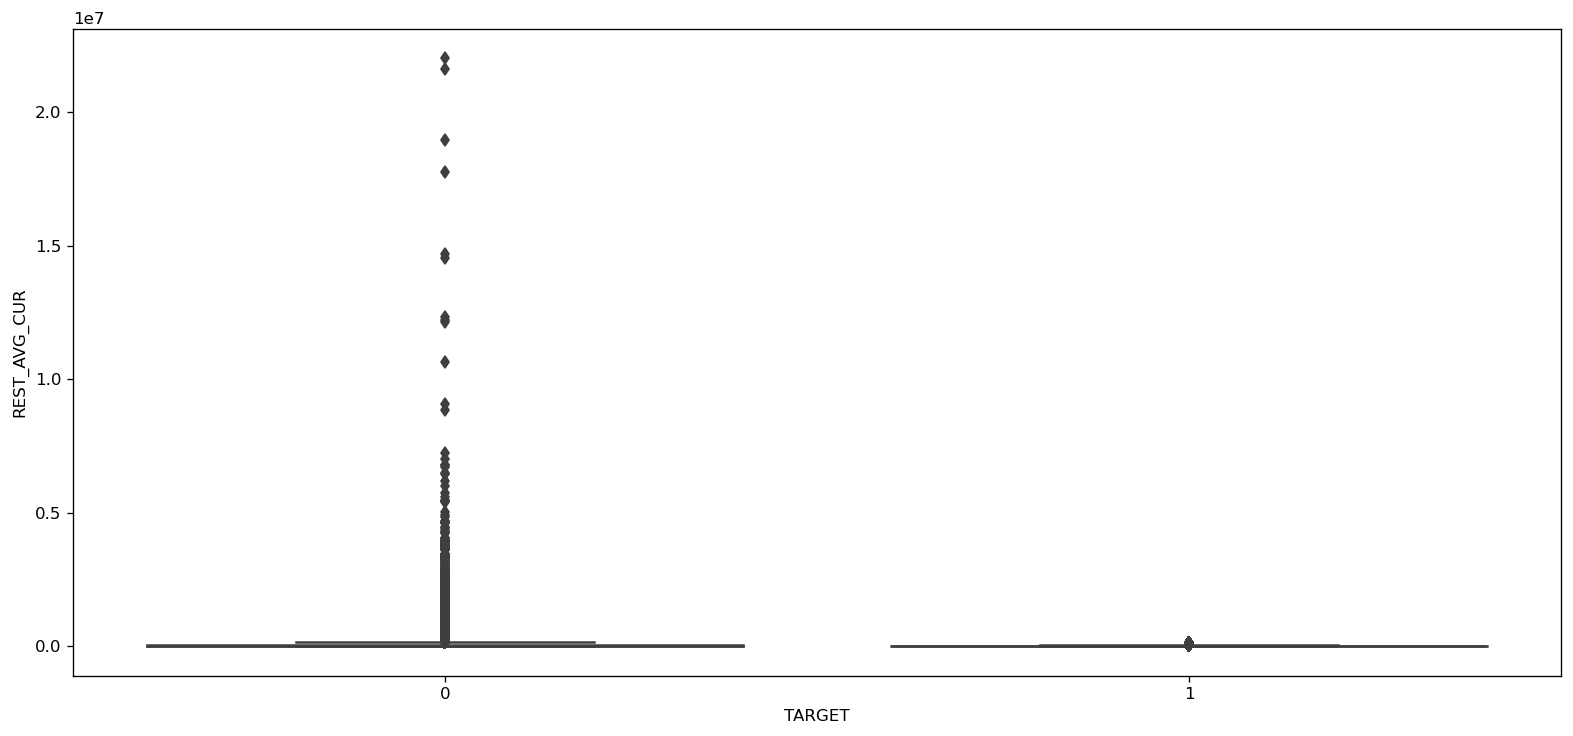

In [1035]:
plt.figure(figsize=[16,7],dpi=120)
sns.boxplot(df_analysis,x='TARGET',y='REST_AVG_CUR')
plt.show()

## As we can see the outliers have been cleared for this column

We have to apply Onehot to the categorical, otherwise Standard Scaler won't work

In [1036]:
oneh = OneHotEncoder(sparse_output=False)
oneh.fit(X_train[['PACK']])

OneHotEncoder(sparse_output=False)

In [1037]:
col_names = oneh.get_feature_names_out()

In [1038]:
X_train_dummies = pd.DataFrame(oneh.transform(X_train[['PACK']]),columns = col_names)
X_train_dummies.index = X_train.index
X_train = pd.merge(X_train,X_train_dummies,left_index=True,right_index=True)

X_test_dummies = pd.DataFrame(oneh.transform(X_test[['PACK']]),columns = col_names)
X_test_dummies.index = X_test.index
X_test = pd.merge(X_test,X_test_dummies,left_index=True,right_index=True)

In [1039]:
X_train.drop(columns = 'PACK',inplace = True)
X_test.drop(columns = 'PACK',inplace = True)

Now to scale we are using the Standard Scaler

In [1040]:
scaler = StandardScaler()

In [1041]:
scaler.fit(X_train)

StandardScaler()

In [1042]:
X_train_scaled = scaler.transform(X_train)
X_train = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)

In [1043]:
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

Below we will create a list of columns that we will be using

In [1044]:
cols_to_use = ['CR_PROD_CNT_IL', 'TURNOVER_DYNAMIC_IL_1M', 'REST_DYNAMIC_FDEP_1M',
       'REST_AVG_CUR', 'CR_PROD_CNT_PIL', 'TRANS_COUNT_ATM_PRC', 'AGE',
       'REST_DYNAMIC_IL_1M', 'REST_DYNAMIC_CUR_1M', 'REST_AVG_PAYM',
       'CNT_TRAN_SUP_TENDENCY3M', 'REST_DYNAMIC_PAYM_3M',
       'CNT_TRAN_ATM_TENDENCY3M', 'CLNT_SETUP_TENOR', 'REST_DYNAMIC_CC_1M',
       'PACK_101', 'PACK_102', 'PACK_103', 'PACK_104', 'PACK_105', 'PACK_107',
       'PACK_108', 'PACK_109', 'PACK_301', 'PACK_K01', 'PACK_M01', 'PACK_O01']

In [1045]:
X_train = X_train[cols_to_use].copy()
X_test = X_test[cols_to_use].copy()

In [1046]:
from imblearn.under_sampling import RandomUnderSampler

# Define the undersampler
rus = RandomUnderSampler()

# Resample the dataset
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [1047]:
y_resampled = y_resampled.to_frame()

In [1048]:
y_resampled.groupby(['TARGET']).size()

TARGET
0    21693
1    21693
dtype: int64

In [1049]:
X_train = X_resampled
y_train = y_resampled

### Logistic Regression

In [1050]:
# Starting Logistic Regression
logr = LogisticRegression()

#Fitting Logistic Regression
logr.fit(X_train,y_train)

#Printing errors
print('Accuracy of training is '+ str(accuracy_score(y_train,logr.predict(X_train))))
print('Precision of training is '+ str(precision_score(y_train,logr.predict(X_train))))
print('Recall of training is '+ str(recall_score(y_train,logr.predict(X_train))))
print('F1 of training is '+ str(f1_score(y_train,logr.predict(X_train))))
print('ROC AUC of training is '+ str(roc_auc_score(y_train,logr.predict(X_train))))
print()
print('Accuracy of test is '+ str(accuracy_score(y_test,logr.predict(X_test))))
print('Precision of test is '+ str(precision_score(y_test,logr.predict(X_test))))
print('Recall of test is '+ str(recall_score(y_test,logr.predict(X_test))))
print('F1 of test is '+ str(f1_score(y_test,logr.predict(X_test))))
print('ROC AUC of test is '+ str(roc_auc_score(y_test,logr.predict(X_test))))

Accuracy of training is 0.6556031899691145
Precision of training is 0.6246261768506554
Recall of training is 0.7798829115382843
F1 of training is 0.6936733773422444
ROC AUC of training is 0.6556031899691145

Accuracy of test is 0.5467803328903804
Precision of test is 0.12662580017643466
Recall of test is 0.7740597345132744
F1 of test is 0.2176474018778795
ROC AUC of test is 0.650344238440709


### Support Vector Machine

In [1051]:
# Starting SVM
svc = SVC(probability=True)

#Fitting Linear Regression
svc.fit(X_train,y_train)

#Printing errors
print('Accuracy of training is '+ str(accuracy_score(y_train,svc.predict(X_train))))
print('Precision of training is '+ str(precision_score(y_train,svc.predict(X_train))))
print('Recall of training is '+ str(recall_score(y_train,svc.predict(X_train))))
print('F1 of training is '+ str(f1_score(y_train,svc.predict(X_train))))
print('ROC AUC of training is '+ str(roc_auc_score(y_train,svc.predict(X_train))))
print()
print('Accuracy of test is '+ str(accuracy_score(y_test,svc.predict(X_test))))
print('Precision of test is '+ str(precision_score(y_test,svc.predict(X_test))))
print('Recall of test is '+ str(recall_score(y_test,svc.predict(X_test))))
print('F1 of test is '+ str(f1_score(y_test,svc.predict(X_test))))
print('ROC AUC of test is '+ str(roc_auc_score(y_test,svc.predict(X_test))))

Accuracy of training is 0.6776609966348591
Precision of training is 0.6439886423074049
Recall of training is 0.7945881159821141
F1 of training is 0.7114055180668194
ROC AUC of training is 0.6776609966348592

Accuracy of test is 0.5674452127300165
Precision of test is 0.1329236130733729
Recall of test is 0.780558628318584
F1 of test is 0.22716297786720321
ROC AUC of test is 0.6645541345501411


### confusion matrix

In [1052]:
cm = confusion_matrix(y_test,svc.predict(X_test))

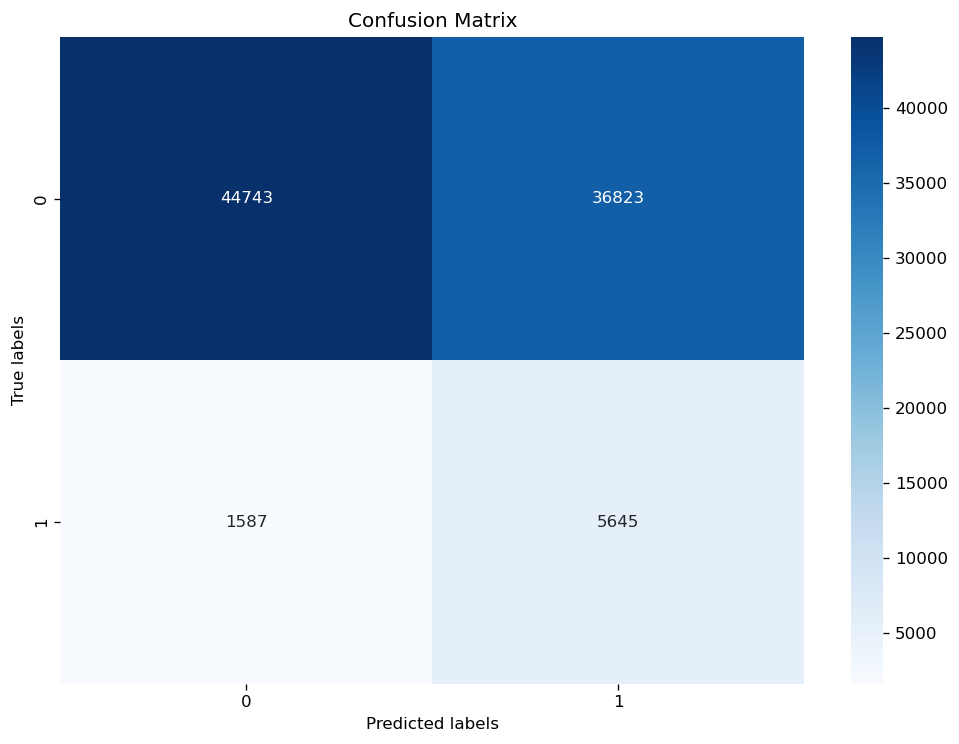

In [1053]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7),dpi=120)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### AUC ROC

In [1054]:
y_prob = svc.predict_proba(X_test)[:, 1]

In [1055]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

In [1056]:
roc_auc = auc(fpr, tpr)

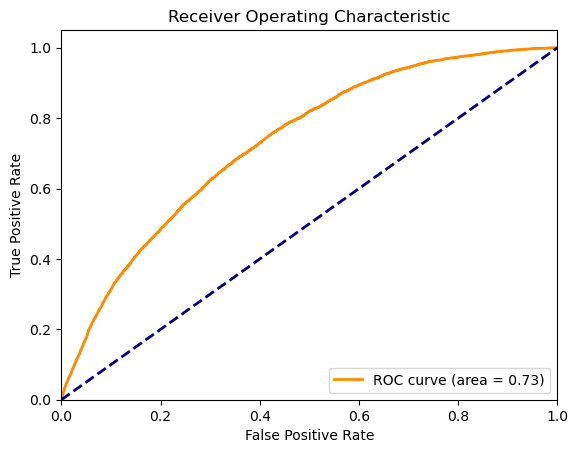

In [1057]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

As we can see even after fixing many variables, we could get a better ROC Curve, but yet our precision is not good. We are slowly progressing